<a href="https://colab.research.google.com/github/gulizsamgar/PYTHON-Exploratory-Data-Analysis-EDA-/blob/main/Python_exploratory_data_analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Python | Keşifsel Veri Analizi (EDA)**

* * *

*Proje Yazarı: Güliz Samğar*

*Son Güncelleme Tarihi: 8 Ağustos 2025*

* * *

**Proje Genel Bakış**

Bu Jupyter not defteri, görev tabanlı keşifsel veri analizi (EDA - Exploratory Data Analysis) prensiplerini kullanarak çeşitli veri setleri üzerinde temel ve orta seviye veri işleme, manipülasyon, analiz ve görselleştirme görevlerini gerçekleştirmeyi amaçlamaktadır.

Proje kapsamında **Car Crashes**, **Titanic** ve **Tips** gibi yaygın olarak kullanılan veri setleri incelenmektedir. Her bir veri seti için adım adım görevler aracılığıyla veri setlerini yükleme, yapılarını anlama, eksik değerleri ele alma, veri filtreleme, gruplama, özetleme, yeni özellikler oluşturma (özellik mühendisliği), değişkenler arası ilişkileri görselleştirme ve temel istatistiksel analizler yapma gibi veri bilimi süreçleri pratik edilmektedir.

Bu not defteri, hem temel veri analizi tekniklerini öğrenmek hem de farklı veri setleri üzerinde bu teknikleri uygulamak için pratik bir rehber niteliğindedir. Her bölüm, yapılan işlemleri, kullanılan yöntemleri ve bazı görevler için alternatif yaklaşımları açıklamaktadır.

---

# Car Crashes Veri Seti (Görev 1-4)

Bu bölüm, car_crashes veri seti üzerinde List Comprehensions ile temel veri işleme adımlarını gösterir.

**Kütüphanelerin İçe Aktarılması ve Görüntü Ayarları**

Bu bölüm, veri analizi için gerekli kütüphaneleri içe aktarır ve pandas görüntü ayarlarını yapılandırır.

In [ ]:
# Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import seaborn as sns

# Pandas gösterim ayarlarını yapılandırıyoruz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

İlk kısım gerekli kütüphaneleri içe aktarır. `pandas`, veri işleme ve analiz için güçlü bir kütüphanedir ve `pd` takma adıyla içe aktarılır. `seaborn`, `matplotlib` tabanlı bir veri görselleştirme kütüphanesidir ve `sns` takma adıyla içe aktarılır.

pd.set_option satırları, pandas DataFramelerinin nasıl görüntüleneceğini yapılandırır.

*   `pd.set_option('display.max_rows', None)`, bir DataFrame yazdırıldığında çıktıyı kesmek yerine tüm satırların görüntülenmesini sağlar.
*   `pd.set_option('display.max_columns', None)`, benzer şekilde bir DataFrame'in tüm sütunlarının görüntülenmesini sağlar.
*   `pd.set_option('display.width', 500)`, görüntülenen çıktının maksimum genişliğini karakter cinsinden ayarlar.

---

**Veri Setini Yükleme**

In [ ]:
# Görev 1: car_crashes veri setini yüklüyoruz
df = sns.load_dataset('car_crashes')

In [ ]:
# Açıklama: veri setinin sütun isimlerini kontrol ediyoruz
_df_columns = df.columns
print(_df_columns)
# Açıklama: veri setinin genel bilgilerini ekrana yazdırıyoruz
_df_info = df.info()

Index(['total', 'speeding', 'alcohol', 'not_distracted', 'no_previous', 'ins_premium', 'ins_losses', 'abbrev'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


*  **Görev 1:** Bu satır, seaborn kütüphanesinde bulunan yerleşik bir veri seti olan `car_crashes` veri setini yükler. Veri seti, bir eyalet başına bir kayıt olmak üzere 50 kayıttan oluşur. Veri seti, araba kazalarıyla ilgili çeşitli bilgileri içerir. Yüklenen veri seti, `df` adında bir `pandas DataFrame`'ine aktarılır.

------

**Sütun Adlarını Değiştirme**

Bu bölüm, veri setindeki sütun adlarını belirli kurallara göre değiştirme veya yeniden adlandırma işlemlerini içerir.

In [ ]:
# Görev 2: Nümerik değişken isimlerini büyük harfe çevirip başına 'NUM_' eki ekliyoruz
numeric_cols = [
    'NUM_' + col.upper() if df[col].dtype != 'O' else col.upper()
    for col in df.columns
]
print(numeric_cols)

# Görev 3: İsmi 'no' içermeyen sütunların sonuna '_FLAG' eki ekliyoruz
flagged_cols = [
    col.upper() + '_FLAG' if 'no' not in col else col.upper()
    for col in df.columns
]
print(flagged_cols)

['NUM_TOTAL', 'NUM_SPEEDING', 'NUM_ALCOHOL', 'NUM_NOT_DISTRACTED', 'NUM_NO_PREVIOUS', 'NUM_INS_PREMIUM', 'NUM_INS_LOSSES', 'ABBREV']
['TOTAL_FLAG', 'SPEEDING_FLAG', 'ALCOHOL_FLAG', 'NOT_DISTRACTED', 'NO_PREVIOUS', 'INS_PREMIUM_FLAG', 'INS_LOSSES_FLAG', 'ABBREV_FLAG']


 Bu iki görev, belirli kriterlere göre yeni sütun adı listeleri oluşturma işlemleri gerçekleştirir. **Önemli:** Bu işlemler yalnızca olası sütun adlarının yeni listelerini oluşturur; df DataFrame'inin sütun adlarını gerçekten değiştirmezler.

*  **Görev 2:** Bu kod, numeric_cols adında bir liste oluşturur. df DataFrame'indeki her sütun adını yineler. Eğer bir sütunun veri tipi `(df[col].dtype) `'O' değilse (bu genellikle pandas'ta object veya string veriyi temsil eder), sütun adını büyük harfe dönüştürür ve başına `'NUM_'` ekini getirir. Eğer veri tipi 'O' ise, yalnızca sütun adını büyük harfe dönüştürür. Oluşturulan liste daha sonra yazdırılır.

*  **Alternatif Yaklaşım:** Sütun isimlerini doğrudan DataFrame üzerinde değiştirmek isterseniz, `.rename()` metodunu veya sütun listesini atamayı kullanabilirsiniz.


In [ ]:
# DataFrame sütunlarını doğrudan değiştirmek için alternatif (Dikkat: Orijinal df değişir)
    # Yeni sütun isimleri için bir dictionary oluşturulması gerekir
    # numeric_mapping = {col: 'NUM_' + col.upper() if df[col].dtype != 'O' else col.upper() for col in df.columns}
    # df.rename(columns=numeric_mapping, inplace=True)
    # print(df.head())

*  **Görev 3:** Yine bir liste anlama yöntemi kullanılarak,`flagged_cols` adında bir liste oluşturur. İçinde `'no'` kelimesi geçmeyen sütun adlarının sonuna `'_FLAG' `eki eklenir ve tüm harfler büyük yapılır. İçinde `'no'` geçen sütun adları sadece büyük harfe çevrilir. Bu da DataFrame'in kendisini değil, sütun adlarının yeni bir listesini oluşturur ve yazdırılır. Oluşturulan liste daha sonra yazdırılır.

---

**Yeni Bir DataFrame Oluşturma**

Bu bölüm, orijinal veri setinden belirli sütunları seçerek yeni bir DataFrame oluşturur.

In [ ]:
# Görev 4: 'abbrev' ve 'no_previous' dışındaki sütunlarla yeni DataFrame oluşturuyoruz
og_list = ['abbrev', 'no_previous']
new_cols = [col for col in df.columns if col not in og_list]
new_df = df[new_cols]
print(new_df.head())

   total  speeding  alcohol  not_distracted  ins_premium  ins_losses
0   18.8     7.332    5.640          18.048       784.55      145.08
1   18.1     7.421    4.525          16.290      1053.48      133.93
2   18.6     6.510    5.208          15.624       899.47      110.35
3   22.4     4.032    5.824          21.056       827.34      142.39
4   12.0     4.200    3.360          10.920       878.41      165.63


*  **Görev 4:** Bu görev, orijinal df DataFrame'ini temel alarak new_df adında yeni bir DataFrame oluşturur.
* 	`og_list = ['abbrev', 'no_previous']` yeni DataFrame'den hariç tutulacak sütun adlarını içeren bir liste tanımlar.
*  `new_cols = [col for col in df.columns if col not in og_list]` bir liste anlaşması (list comprehension) kullanarak `new_cols` adında yeni bir liste oluşturur. Bu liste, df.columns'daki tüm sütun adlarını ancak `og_list`'te bulunanları hariç tutarak içerir.
*  `new_df = df[new_cols]` orijinal df DataFrame'inden yalnızca `new_cols` listesinde belirtilen sütunları seçerek yeni DataFrame `new_df`'yi oluşturur.
*  `print(new_df.head())` yeni oluşturulan new_df DataFrame'inin ilk beş satırını yazdırır, böylece hariç tutulan sütunlar olmadan yapısını ve içeriğini görebilirsiniz.

    * **Alternatif Yaklaşım:** Görev 2'deki gibi, bu değişiklikleri DataFrame üzerinde yapmak için `.rename()` kullanılabilir.

In [ ]:
# DataFrame sütunlarını doğrudan değiştirmek için alternatif (Dikkat: Orijinal df değişir)
    # Yeni sütun isimleri için bir dictionary oluşturulması gerekir
    # numeric_mapping = {col: 'NUM_' + col.upper() if df[col].dtype != 'O' else col.upper() for col in df.columns}
    # df.rename(columns=numeric_mapping, inplace=True)

---

---

# Titanic Veri Seti (Görev 1-32)

Bu bölüm, ünlü Titanic veri seti üzerinde daha detaylı veri keşfi ve temizleme görevlerini gerçekleştirir.

**Kütüphanelerin İçe Aktarılması ve Görüntü Ayarları**

In [ ]:
# Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Pandas gösterim ayarlarını yapılandırıyoruz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# Görselleştirme stillerini ayarlıyoruz
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [12, 8]

* `from scipy import stats`: İstatistiksel fonksiyonlar ve olasılık dağılımları içeren scipy kütüphanesinin stats modülünü içe aktarır.

**Görselleştirme Stillerinin Ayarlanması:**
* `plt.style.use('seaborn-v0_8-whitegrid')`: Matplotlib ve seaborn grafiklerinin stilini 'seaborn-v0_8-whitegrid' olarak ayarlar. Bu stil, beyaz bir arka plan ve ızgara çizgileri ekleyerek grafiklerin daha temiz ve okunaklı olmasını sağlar.
* `sns.set_palette("deep")`: Seaborn grafiklerinde kullanılacak varsayılan renk paletini 'deep' olarak ayarlar. Bu palet, kategorik verileri görselleştirmek için uygun, belirgin renkler içerir.
* `plt.rcParams['figure.figsize'] = [12, 8]`: Oluşturulan grafiklerin varsayılan boyutunu ayarlar. Genişlik 12 inç, yükseklik ise 8 inç olur. Bu, grafiklerin daha büyük ve detayların daha görünür olmasını sağlar.

---

**Veri Setini Yükleme**

In [ ]:
# Görev 1: Titanic veri setini yüklüyoruz
df = sns.load_dataset('titanic')

In [ ]:
# Açıklama: ilk 5 satırı görüntülüyoruz
_df_head = df.head()
print("\nFirst 5 rows:")
display(_df_head)
# Açıklama: veri setinin boyutunu (satır, sütun) olarak kontrol ediyoruz
_df_shape = df.shape
print("\nDataset Shape:",_df_shape)
# Açıklama: veri setinin genel bilgilerini ekrana yazdırıyoruz
print("\nData Information:")
_df_info = df.info()


First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Dataset Shape: (891, 15)

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


*  **Görev 1:** Bu satır, seaborn kütüphanesinde bulunan yerleşik bir veri seti olan titanic veri setini yükler. Titanic veri seti, 1912'deki RMS Titanic gemisinin yolcuları hakkında bilgiler içeren popüler bir veri setidir. Bu veri seti genellikle veri bilimi ve makine öğrenmesi eğitimlerinde kullanılır.

    Veri setinde genellikle aşağıdaki gibi sütunlar bulunur:

  *   `survived`: Yolcunun hayatta kalma durumu (biner kodlanmış: 0 - Hayatta Kalmadı, 1 - Hayatta Kaldı).
  *   `pclass`: Yolcu sınıfı (ordinal: 1. Sınıf, 2. Sınıf, 3. Sınıf).
  *   `sex`: Yolcunun cinsiyeti (nominal: male, female).
  *   `age`: Yolcunun yaşı (sürekli).
  *   `sibsp`: Gemideki kardeş veya eş sayısı (discrete).
  *   `parch`: Gemideki ebeveyn veya çocuk sayısı (discrete).
  *   `fare`: Yolcu bileti ücreti (sürekli).
  *   `embarked`: Yolcunun biniş limanı (nominal: Cherbourg, Queenstown, Southampton).
  *   `class`: Yolcu sınıfının kategorik temsili (ordinal: First, Second, Third).
  *   `who`: Yolcunun demografik sınıflandırması (nominal: man, woman, child).
  *   `adult_male`: Yolcunun yetişkin bir erkek olup olmadığı (boolean).
  *   `deck`: Yolcunun kabin güvertesi (nominal).
  *   `embark_town`: Yolcunun biniş limanının tam adı (nominal).
  *   `alive`: Yolcunun hayatta kalma durumu (nominal: yes, no).
  *   `alone`: Yolcunun yalnız seyahat edip etmediği (boolean).

---

**Temel Veri Keşfi**

Bu bölüm, veri setinin yapısını, içeriğini ve temel özelliklerini inceler

In [ ]:
# Görev 2: Nümerik Sütunların Tanımlayıcı İstatistiklerini Görüntülüyoruz
print("\nDescriptive Statistics:\n")
print(df.describe())


Descriptive Statistics:

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


*  **Görev 2:** veri setindeki nümerik (sayısal) sütunların temel istatistiksel özetlerini hesaplar ve yazdırır. `df.describe()` metodu; her bir nümerik sütun için toplam sayı (count), ortalama (mean), standart sapma (std), minimum değer (min), çeyrek değerler (%25, %50, %75) ve maksimum değer (max) gibi bilgileri sağlar. Bu özet, veri setinin merkezi eğilimini, dağılımını ve aralığını anlamak için faydalıdır.

In [ ]:
# Görev 3: Kadın ve erkek yolcu sayısını buluyoruz
print("\nNumber of Females:")
print(df['sex'].value_counts())

# Alternatif Yaklaşım: groupby kullanarak sayım
# print(df.groupby('sex').size())

# Alternatif Yaklaşım: groupby kullanarak size ile count
# print(df.groupby('sex')['sex'].count())


Number of Females:
sex
male      577
female    314
Name: count, dtype: int64


In [ ]:
# Görev 4: Her sütundaki benzersiz değer sayısını buluyoruz
print("\nNumber of Unique Values:")
print(df.nunique())


Number of Unique Values:
survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64


In [ ]:
# Görev 5: 'pclass' sütununun benzersiz değerlerini alıyoruz
print("\nUnique Values:")
print(df['pclass'].unique())


Unique Values:
[3 1 2]


In [ ]:
# Görev 6: 'pclass' ve 'parch' sütunlarının benzersiz değer sayılarını buluyoruz
print("\nNumber of Unique Values:")
print(df[['pclass', 'parch']].nunique())


Number of Unique Values:
pclass    3
parch     7
dtype: int64


* **Görev 2-6:** Veri setindeki temel özet istatistikler ve benzersiz değerler incelenir. `value_counts()` yerine `groupby().size()` gibi alternatifler de aynı sayım işlemini yapabilir.

---

**Veri Tipi Dönüşümü**

Bu bölüm, veri setindeki sütunların veri tiplerini analiz için uygun hale getirir.

In [ ]:
# Görev 7: 'embarked' sütununun veri tipini kontrol edip kategorik tipe dönüştürüyoruz
print(df['embarked'].dtype)
df['embarked'] = df['embarked'].astype('category')
print(df['embarked'].dtype)

# Alternatif Yaklaşım: categorical dtype belirtmeden dönüştürme
# df['embarked'] = df['embarked'].astype(str) # String'e dönüştürme örneği

# Alternatif Yaklaşım: pd.Categorical ile daha spesifik kontrol
# df['embarked'] = pd.Categorical(df['embarked'])

object
category


*  **Görev 7:** *'embarked'* sütununun veri tipi kontrol edilir ve kategorik tipe dönüştürülür. Farklı veri tiplerine dönüştürmek veya `pd.Categorical `gibi daha kontrollü dönüşümler yapmak alternatiflerdir.

---

**Veri Filtreleme ve Seçimi**

Bu bölüm, belirli koşullara uyan veri alt kümelerini seçerek veri setini filtreler.

In [ ]:
# Görev 8: 'embarked' değeri 'C' olan kayıtları gösteriyoruz
print(df[df['embarked'] == 'C'].head(10))

# Alternatif Yaklaşım: .loc[] ile aynı işlevi görme
# print(df.loc[df['embarked'] == 'C'].head(10))

    survived  pclass     sex   age  sibsp  parch      fare embarked   class    who  adult_male deck embark_town alive  alone
1          1       1  female  38.0      1      0   71.2833        C   First  woman       False    C   Cherbourg   yes  False
9          1       2  female  14.0      1      0   30.0708        C  Second  child       False  NaN   Cherbourg   yes  False
19         1       3  female   NaN      0      0    7.2250        C   Third  woman       False  NaN   Cherbourg   yes   True
26         0       3    male   NaN      0      0    7.2250        C   Third    man        True  NaN   Cherbourg    no   True
30         0       1    male  40.0      0      0   27.7208        C   First    man        True  NaN   Cherbourg    no   True
31         1       1  female   NaN      1      0  146.5208        C   First  woman       False    B   Cherbourg   yes  False
34         0       1    male  28.0      1      0   82.1708        C   First    man        True  NaN   Cherbourg    no  False


In [ ]:
# Görev 9: 'embarked' değeri 'S' olmayan kayıtları gösteriyoruz
print(df[df['embarked'] != 'S'].head(10))

# Alternatif Yaklaşım: .loc[] ile aynı işlevi görme
# print(df.loc[df['embarked'] != 'S'].head(10))

# Alternatif Yaklaşım: .isin() ve negasyon (~) kullanma
# print(df[~df['embarked'].isin(['S'])].head(10))

    survived  pclass     sex   age  sibsp  parch      fare embarked   class    who  adult_male deck embark_town alive  alone
1          1       1  female  38.0      1      0   71.2833        C   First  woman       False    C   Cherbourg   yes  False
5          0       3    male   NaN      0      0    8.4583        Q   Third    man        True  NaN  Queenstown    no   True
9          1       2  female  14.0      1      0   30.0708        C  Second  child       False  NaN   Cherbourg   yes  False
16         0       3    male   2.0      4      1   29.1250        Q   Third  child       False  NaN  Queenstown    no  False
19         1       3  female   NaN      0      0    7.2250        C   Third  woman       False  NaN   Cherbourg   yes   True
22         1       3  female  15.0      0      0    8.0292        Q   Third  child       False  NaN  Queenstown   yes   True
26         0       3    male   NaN      0      0    7.2250        C   Third    man        True  NaN   Cherbourg    no   True


In [ ]:
# Görev 10: Yaşı 30'dan küçük ve kadın yolcuları seçiyoruz
print(df[(df['age'] < 30) & (df['sex'] == 'female')].head())

# Alternatif Yaklaşım: .loc[] ile aynı işlevi görme
# print(df.loc[(df['age'] < 30) & (df['sex'] == 'female')].head())

    survived  pclass     sex   age  sibsp  parch     fare embarked   class    who  adult_male deck  embark_town alive  alone
2          1       3  female  26.0      0      0   7.9250        S   Third  woman       False  NaN  Southampton   yes   True
8          1       3  female  27.0      0      2  11.1333        S   Third  woman       False  NaN  Southampton   yes  False
9          1       2  female  14.0      1      0  30.0708        C  Second  child       False  NaN    Cherbourg   yes  False
10         1       3  female   4.0      1      1  16.7000        S   Third  child       False    G  Southampton   yes  False
14         0       3  female  14.0      0      0   7.8542        S   Third  child       False  NaN  Southampton    no   True


In [ ]:
# Görev 11: 'fare' > 500 veya yaşı 70'ten büyük yolcuları seçiyoruz
print(df[(df['fare'] > 500) | (df['age'] > 70)].head())

# Alternatif Yaklaşım: .loc[] ile aynı işlevi görme
# print(df.loc[(df['fare'] > 500) | (df['age'] > 70)].head())

     survived  pclass     sex   age  sibsp  parch      fare embarked  class    who  adult_male deck  embark_town alive  alone
96          0       1    male  71.0      0      0   34.6542        C  First    man        True    A    Cherbourg    no   True
116         0       3    male  70.5      0      0    7.7500        Q  Third    man        True  NaN   Queenstown    no   True
258         1       1  female  35.0      0      0  512.3292        C  First  woman       False  NaN    Cherbourg   yes   True
493         0       1    male  71.0      0      0   49.5042        C  First    man        True  NaN    Cherbourg    no   True
630         1       1    male  80.0      0      0   30.0000        S  First    man        True    A  Southampton   yes   True


* **Görev 8-11:** Belirli koşullara (embarked değeri, yaş ve cinsiyet, ücret ve yaş) uyan yolcular (`[]` veya `.loc[]` kullanarak) filtrelenir ve ilk birkaç kaydı görüntülenir. Bu, veri alt kümelerini seçmeyi gösterir. `'!='` yerine `~.isin()` gibi alternatif filtreleme yöntemleri de mevcuttur.

---

**Veri Temizliği**

Bu bölüm, veri setindeki eksik veya hatalı değerleri ele alarak veri setini analize hazırlar.

Modellemeden önce eksik verileri değerlendirmemiz ve ele almamız gerekir:

In [ ]:
# Görev 12: Her sütundaki boş değerlerin toplamını buluyoruz
print("\nMissing Values Analysis:")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1,
 keys=['Missing Count', 'Missing Percent'])
print(missing_data[missing_data['Missing Count'] > 0])

# Alternatif Yaklaşım: .info() ile genel bilgi alma (eksik olmayan sayısını gösterir)
# print(df.info())


Missing Values Analysis:
             Missing Count  Missing Percent
deck                   688        77.216611
age                    177        19.865320
embarked                 2         0.224467
embark_town              2         0.224467


*  **Görev 12:** Veri setindeki her sütundaki eksik (NaN) değerlerin sayısını ve bunların toplam veri içindeki yüzdesini hesaplar ve yazdırır. Öncelikle, `df.isnull().sum()` ile her sütundaki eksik değerlerin sayısını bulur ve `sort_values(ascending=False)` ile eksiklik sayısına göre azalan sırada sıralar. Ardından, eksik değer sayısını veri setindeki toplam satır sayısına (`len(df)`) bölerek eksiklik yüzdesini hesaplar. Son olarak, `pd.concat()` kullanarak eksiklik sayılarını ve yüzdelerini yan yana getirerek `missing_data` adında bir DataFrame oluşturur ve sadece eksik değeri olan sütunları (`missing_data[missing_data['Missing Count'] > 0]`) yazdırır. Bu analiz, veri setindeki eksikliklerin tespiti ve anlaşılması için önemlidir.

In [ ]:
# Görev 13: 'who' sütununu DataFrame'den çıkarıyoruz
if 'who' in df.columns:
    df.drop('who', axis=1, inplace=True)
    print("'who' column was successfully extracted.")
else:
    print("Column 'who' not found in DataFrame.")

# Alternatif Yaklaşım: columns parametresiyle düşürme
# if 'who' in df.columns:
#     df.drop(columns=['who'], inplace=True)
#     print("'who' sütunu başarıyla çıkarıldı (columns parametresiyle).")

'who' column was successfully extracted.


*  **Görev 13:** *'who'* sütunu DataFrame'den `drop()` metodu ile kalıcı olarak `(inplace=True)` çıkarılır. Bu, veri temizleme adımıdır.

In [ ]:
# Görev 14: 'deck' sütunundaki NaN değerleri en sık görülen değer (mode) ile dolduruyoruz

# Boş (NaN) değer sayısını kontrol et
print("Missing values:",df['deck'].isnull().sum())
# En çok tekrar eden değeri (modu) bul
mode_deger = df['deck'].mode()[0]
# Boş (NaN) değerleri bu mod değeri ile doldur
df['deck'] = df['deck'].fillna(mode_deger)
# Boş (NaN) değer sayısını tekrar kontrol et
print("Missing data after data filling:",df['deck'].isnull().sum())

# Alternatif Yaklaşım: inplace=True kullanma
# df['deck'].fillna(df['deck'].mode()[0], inplace=True)

Missing values: 688
Missing data after data filling: 0


In [ ]:
# Görev 15: 'age' sütunundaki NaN değerleri medyan ile dolduruyoruz

# Boş (NaN) değer sayısını kontrol et
print("Missing values:",df['age'].isnull().sum())
# Medyan değeri bul
medyan_deger = df['age'].median()
# Boş (NaN) değerleri medyan ile doldur
df['age'] = df['age'].fillna(medyan_deger)
# Boş (NaN) değer sayısını tekrar kontrol et
print("Missing data after data filling:",df['age'].isnull().sum())

# Alternatif Yaklaşım: inplace=True kullanma
# df['age'].fillna(df['age'].median(), inplace=True)

# Alternatif Yaklaşım: Ortalama ile doldurma
# df['age'].fillna(df['age'].mean(), inplace=True)

# Alternatif Yaklaşım: Belirli bir değerle doldurma (örneğin 0)
# df['age'].fillna(0, inplace=True)


Missing values: 177
Missing data after data filling: 0


* **Görev 14-15:** Eksik değerler sırasıyla mod ve medyan ile `fillna()` metodu kullanılarak doldurulur. `inplace=True` argümanı kullanarak atama yapmadan DataFrame'i doğrudan değiştirmek veya eksik değerleri ortalama ya da sabit bir değerle doldurmak alternatif yöntemlerdir.

---

**Veri Gruplama ve Gruplara Göre Özet İstatistikler**

Bu bölüm, veri setini belirli sütunlara göre gruplandırarak toplu istatistikleri hesaplar.

In [ ]:
# Görev 16: 'survived' değişkenini pclass ve sex kırılımında sum, count, mean ile analiz ediyoruz
print(df.groupby(['pclass', 'sex'])['survived'].agg(['sum', 'count', 'mean']))

# Alternatif Yaklaşım: Farklı agregasyon fonksiyonları listesi kullanma
# print(df.groupby(['pclass', 'sex'])['survived'].agg([np.sum, 'count', np.mean])) # numpy fonksiyonlarını kullanma

# Alternatif Yaklaşım: Birden fazla sütuna aynı agregasyonları uygulama
# print(df.groupby(['pclass', 'sex'])[['survived', 'fare']].agg(['mean']))


               sum  count      mean
pclass sex                         
1      female   91     94  0.968085
       male     45    122  0.368852
2      female   70     76  0.921053
       male     17    108  0.157407
3      female   72    144  0.500000
       male     47    347  0.135447


*	**Görev 16:** *'survived' değişkeni*, *'pclass'* ve *'sex'* sütunlarına göre gruplandırılarak `toplam (sum)`, `sayı (count)` ve `ortalama (mean)` gibi toplu istatistikler hesaplanır. Bu, gruplama ve toplama yeteneklerini gösterir. Farklı agregasyon fonksiyonları kullanmak veya aynı anda birden fazla sütuna aynı agregasyonları uygulamak olası alternatiflerdir.

---

**Özellik Mühendisliği**

Bu bölüm, mevcut sütunlardan yeni ve anlamlı özellikler oluşturarak veri setini zenginleştirir.

In [ ]:
# Görev 17: 'family_size' adında yeni bir sütun ekliyoruz (sibsp + parch + 1)
df['family_size'] = df['sibsp'] + df['parch'] + 1
print(df[['sibsp', 'parch', 'family_size']].head())

   sibsp  parch  family_size
0      1      0            2
1      1      0            2
2      0      0            1
3      1      0            2
4      0      0            1


*  **Görev 17:** `sibsp` (kardeş/eş sayısı) ve `parch` (ebeveyn/çocuk sayısı) sütunlarını toplayıp 1 ekleyerek her yolcunun aile büyüklüğünü hesaplar. Sonuç, `family_size` adında yeni bir sütuna atanır. Kendisi de aileye dahil olduğu için 1 eklenir. Yeni oluşturulan sütunun ilk birkaç değeri, ilgili `sibsp` ve `parch` sütunlarıyla birlikte ekrana yazdırılır.

In [ ]:
import numpy as np

# Görev 18: Yaşa göre 'child' (çocuk) ve 'adult' (yetişkin) olarak iki kategoriye ayıran yeni bir sütun oluşturuyoruz
df['age_category'] = np.where(df['age'] < 18, 'child', 'adult')
print(df[['age', 'age_category']].head())

# Alternatif Yaklaşım: .apply() kullanma
# df['age_category'] = df['age'].apply(lambda x: 'child' if x < 18 else 'adult')
# print(df[['age', 'age_category']].head())

# Alternatif Yaklaşım: fonksiyon kullanma
#def  age_category(age):
#   if age< "18":
#        return 'child'
#    else:
#        return 'adult'
#df["age_category"] = df["age"].apply(lambda x: age_category(x))
#df.head()




    age age_category
0  22.0        adult
1  38.0        adult
2  26.0        adult
3  35.0        adult
4  35.0        adult


*   **Görev 18:** *age* sütunundaki değerlere göre yeni bir kategori sütunu oluşturur. `numpy` kütüphanesinin `where()` fonksiyonu kullanılarak, yaşı 18'den küçük olanlar 'child', diğerleri ise 'adult' olarak etiketlenir ve bu değerler `age_category` sütununa yazılır. Yaş ve yeni oluşturulan kategori sütununun ilk birkaç değeri ekrana yazdırılır. Aynı işlem `.apply()` metodu ve bir `lambda` fonksiyonu ile de yapılabilir.

---

**Tek Değişkenli (Univariate) Analiz - Kategorik Özellikler**

Bu bölüm temel kategorik değişkenlerin dağılımını analiz eder: Hayatta kalma durumu - Yolcu sınıfı - Cinsiyet - Biniş limanı

Bu görselleştirmeler, kategorilerin sıklığını ve dengesini anlamamıza yardımcı olur.


Survival Distribution:
survived
0    549
1    342
Name: count, dtype: int64


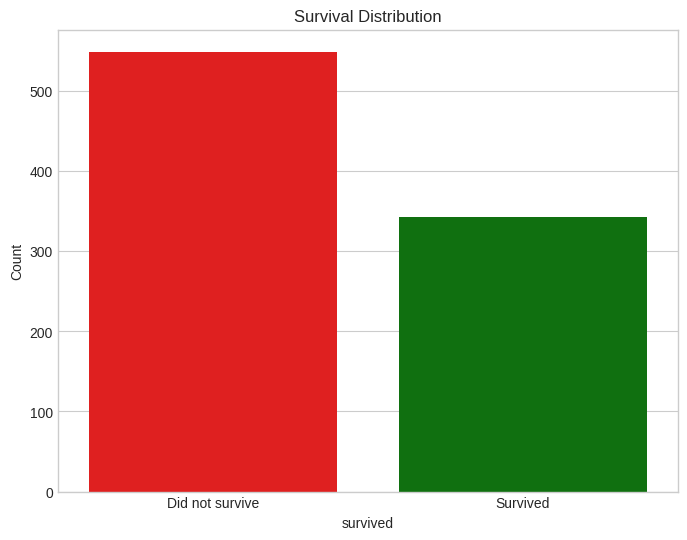


Passenger Class Distribution:
pclass
3    491
1    216
2    184
Name: count, dtype: int64


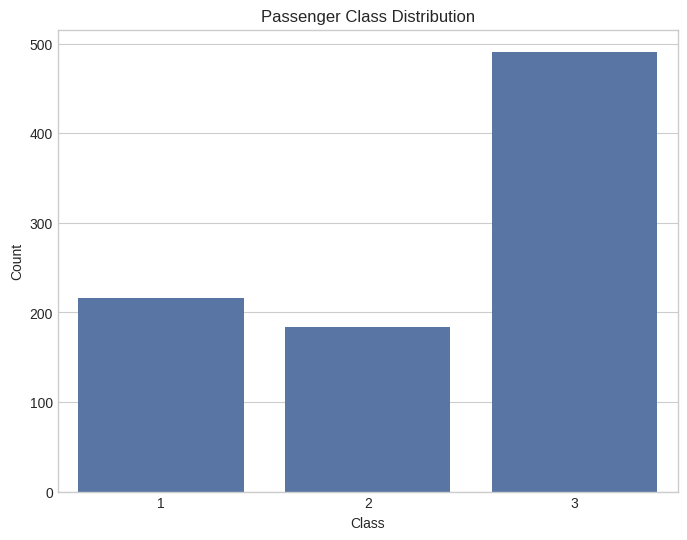


Gender Distribution:
sex
male      577
female    314
Name: count, dtype: int64


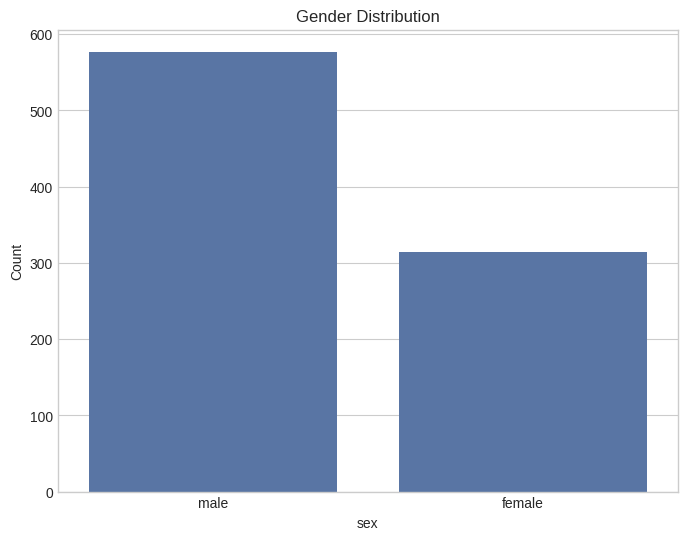


Embarkation Port Distribution:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64


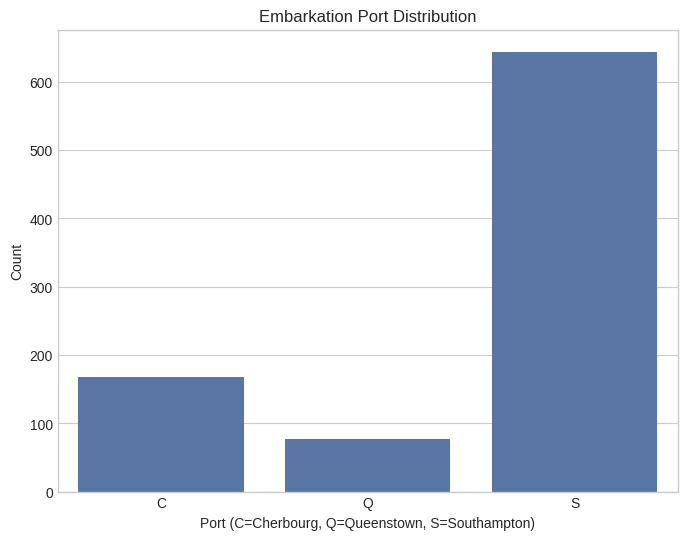

In [ ]:
# Görev 19: Hayatta Kalma Dağılımını Analiz Etme ve Görselleştirme
print("\nSurvival Distribution:")
survival_counts = df['survived'].value_counts()
print(survival_counts)
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df, palette=['red', 'green'], hue='survived', legend=False)
plt.title('Survival Distribution')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.ylabel('Count')
plt.show()

# Görev 20: Cinsiyet Dağılımını Analiz Etme ve Görselleştirme
print("\nPassenger Class Distribution:")
print(df['pclass'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='pclass', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Görev 21: Yolcu Sınıfı Dağılımını Analiz Etme ve Görselleştirme
print("\nGender Distribution:")
print(df['sex'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.ylabel('Count')
plt.show()

# Görev 22: Biniş Limanı Dağılımını Analiz Etme ve Görselleştirme
print("\nEmbarkation Port Distribution:")
print(df['embarked'].value_counts())
plt.figure(figsize=(8, 6))
sns.countplot(x='embarked', data=df)
plt.title('Embarkation Port Distribution')
plt.xlabel('Port (C=Cherbourg, Q=Queenstown, S=Southampton)')
plt.ylabel('Count')
plt.show()

*  **Görev 19:** *survived* sütunundaki (hayatta kalma durumu) değerlerin sayısını hesaplar (value_counts()) ve yazdırır. Ardından, bu dağılımı bir çubuk grafik (sns.countplot) ile görselleştirir. Grafik, hayatta kalan ve kalmayan yolcuların sayısını gösterir. Renk paleti ve eksen etiketleri özelleştirilmiştir.

*  **Görev 20:** *pclass* sütunundaki (yolcu sınıfı) her sınıfın (1, 2, 3) kaçar yolcu içerdiğini hesaplar (value_counts()) ve yazdırır. Ardından, bu dağılımı bir çubuk grafik (sns.countplot) ile görselleştirir. Grafik, farklı yolcu sınıflarındaki yolcu sayılarını gösterir.

*  **Görev 21:** *sex* sütunundaki (cinsiyet) kadın ve erkek yolcuların sayısını hesaplar (value_counts()) ve yazdırır. Ardından, bu dağılımı bir çubuk grafik (sns.countplot) ile görselleştirir. Grafik, kadın ve erkek yolcuların sayısını gösterir.

*  **Görev 22:** *embarked* sütunundaki (biniş limanı) her limandan binen yolcu sayısını hesaplar (value_counts()) ve yazdırır. Ardından, bu dağılımı bir çubuk grafik (sns.countplot) ile görselleştirir. Grafik, farklı biniş limanlarından kalkan yolcuların sayısını gösterir.

---

**İki Değişkenli (Bivariate) Analiz - Hayatta Kalma ve Kategorik Özellikler**

Bu bölüm, hayatta kalma oranlarının temel kategorik değişkenler arasında nasıl farklılık gösterdiğini inceler:
* **Yolcu Sınıfı:** Sınıf hayatta kalmayı etkiler mi?
* **Cinsiyet:** Kadınların hayatta kalma olasılığı daha mı yüksek?
* **Biniş Limanı:** Biniş limanı hayatta kalmayı etkiler mi?
* **Yaş Grubu**: Çocukların hayatta kalma olasılığı yetişkinlerden daha mı yüksek?
Bu görselleştirmeler, özelikler ile hedef değişken (Hayatta Kalma) arasındaki ilişkileri ortaya çıkarmaya yardımcı olur.

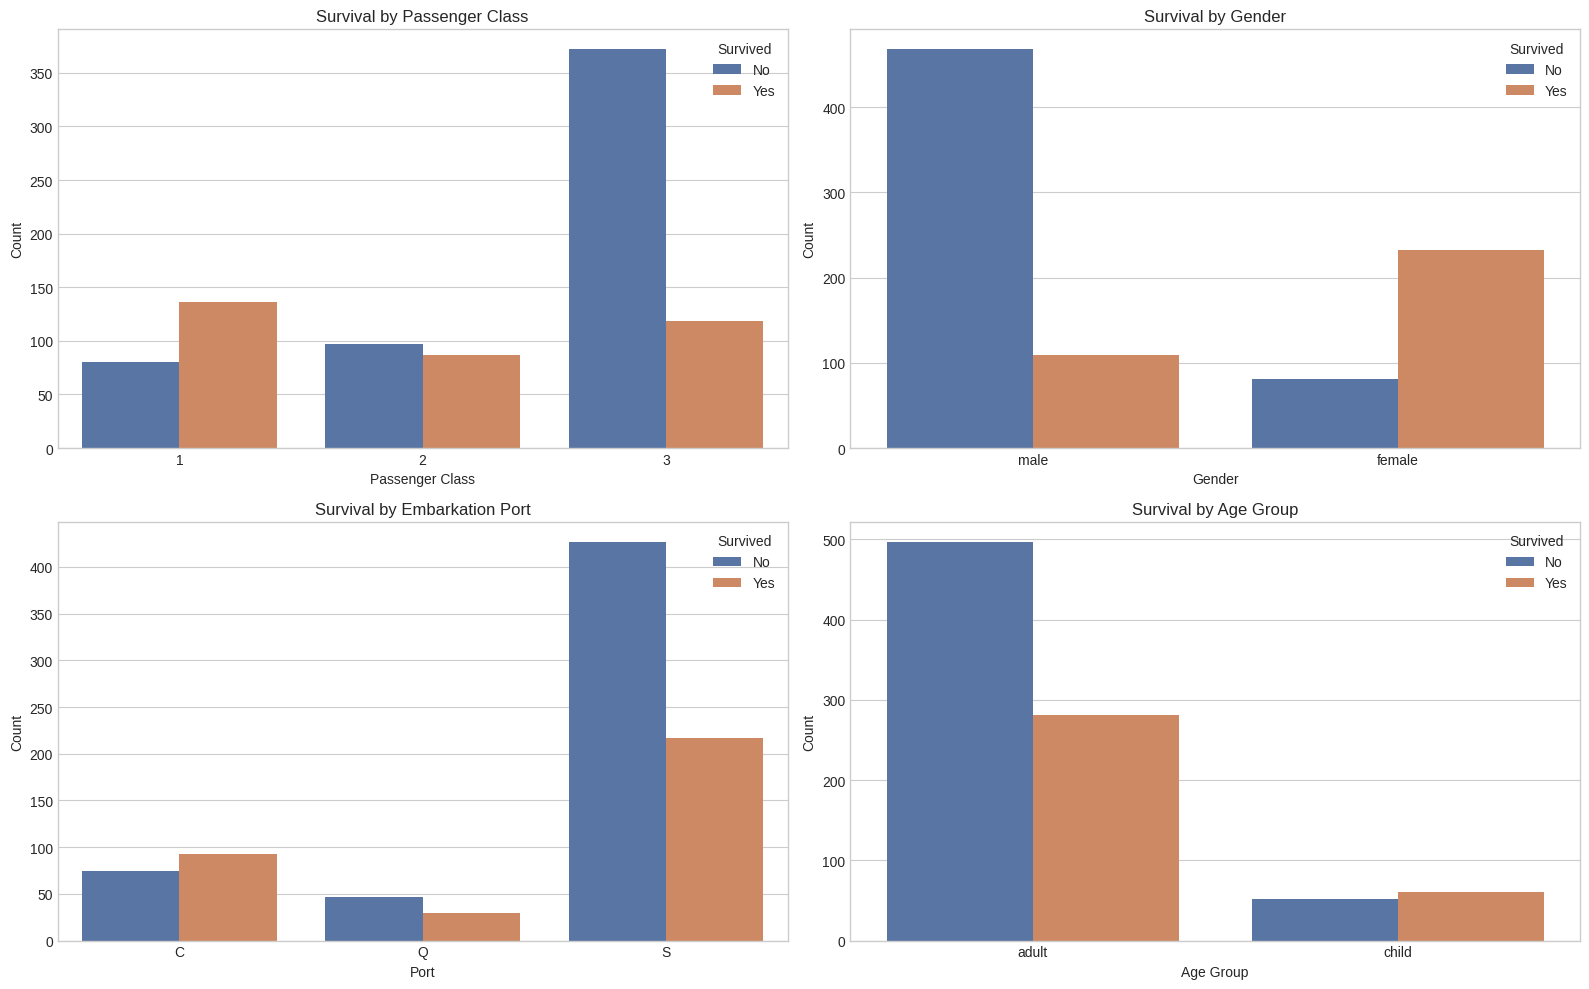

In [ ]:
plt.figure(figsize=(16, 10))

# Görev 23: Yolcu Sınıfına Göre Hayatta Kalma Dağılımını Görselleştirme
plt.subplot(2, 2, 1)
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Görev 24: Cinsiyete Göre Hayatta Kalma Dağılımını Görselleştirme
plt.subplot(2, 2, 2)
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Görev 25: Biniş Limanına Göre Hayatta Kalma Dağılımını Görselleştirme
plt.subplot(2, 2, 3)
sns.countplot(x='embarked', hue='survived', data=df)
plt.title('Survival by Embarkation Port')
plt.xlabel('Port')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Görev 26: Yaş Grubuna Göre Hayatta Kalma Dağılımını Görselleştirme
plt.subplot(2, 2, 4)
# 'Age_Group' sütunu oluşturulmamış olabilir, kontrol edelim veya oluşturalım
if 'age_category' in df.columns:
    sns.countplot(x='age_category', hue='survived', data=df)
    plt.title('Survival by Age Group')
    plt.xlabel('Age Group')
    plt.ylabel('Count')
    plt.legend(title='Survived', labels=['No', 'Yes'])
else:
    print("Warning: Column 'age_category' not found. Please ensure that you have created the column 'age_category'.")


plt.tight_layout()
plt.show()

*   **Görev 23:** Yolcu sınıfına (`pclass`) göre hayatta kalan ve kalmayan yolcuların sayısını gösterir. `sns.countplot()` kullanarak her yolcu sınıfı için hayatta kalma durumuna göre ayrılmış çubuklar çizilir. Bu görselleştirme, birinci sınıftaki yolcuların hayatta kalma oranının üçüncü sınıftaki yolculardan daha yüksek olduğunu açıkça gösterir.

*   **Görev 24:** Cinsiyete (sex) göre hayatta kalan ve kalmayan yolcuların sayısını gösterir. Çubuk grafik, kadınların erkeklere kıyasla önemli ölçüde daha yüksek bir hayatta kalma oranına sahip olduğunu görselleştirir. Bu, cinsiyetin hayatta kalma üzerinde güçlü bir etkisi olduğunu gösterir.

*   **Görev 24:** Biniş limanına (`embarked`) göre hayatta kalan ve kalmayan yolcuların sayısını gösterir. Farklı biniş limanlarından (`C`, `Q`, `S`) kalkan yolcuların hayatta kalma oranlarını karşılaştırır. Southampton'dan (`S`) kalkan yolcuların sayısının en fazla olduğunu, ancak hayatta kalma oranlarının diğer limanlara göre daha düşük olabileceğini gösterir.

*   **Görev 25:** Yaş grubuna (`age_category` - çocuk/yetişkin) göre hayatta kalan ve kalmayan yolcuların sayısını gösterir. `age_category` sütununu kullanarak çocukların yetişkinlere kıyasla daha yüksek bir hayatta kalma oranına sahip olup olmadığını incelemeye olanak tanır. Grafik, çocukların hayatta kalma olasılığının daha yüksek olduğunu gösterir.

*   Bu kod bloğu, Titanic veri setindeki kategorik özellikler ile hayatta kalma durumu arasındaki ilişkileri çeşitli çubuk grafikler kullanarak görselleştirir. `plt.figure(figsize=(16, 10))` ile büyük bir çizim alanı oluşturulur. `plt.subplot()` komutları, bu alanı 2x2'lik bir ızgaraya böler ve her bir alt grafiğe bir görselleştirme yerleştirilir. `sns.countplot()` her bir kategori için sayımları gösterirken, `hue='survived'` hayatta kalma durumuna göre çubukları renklendirir. Grafikler başlıklar, eksen etiketleri ve göstergeler ile açıklanmıştır. Son olarak, `plt.tight_layout()` alt grafiklerin düzenini otomatik olarak ayarlar ve `plt.show()` grafikleri görüntüler.

---

**İki Değişkenli (Bivariate) Analiz - Hayatta Kalma ve Sayısal Özellikler**

Bu bölüm, sayısal değişkenlerin hayatta kalma durumuna göre dağılımlarını karşılaştırır:
* **Yaş:** Daha genç yolcuların hayatta kalma olasılığı daha mı yüksek?
* **Ücret:** Daha yüksek ücret ödeyen yolcuların hayatta kalma şansı daha mı yüksek?

Kutu (Boxplots) grafikleri, bu değişkenlerin hayatta kalma durumuna göre yayılımını ve merkezi eğilimini görselleştirmek için kullanılır.

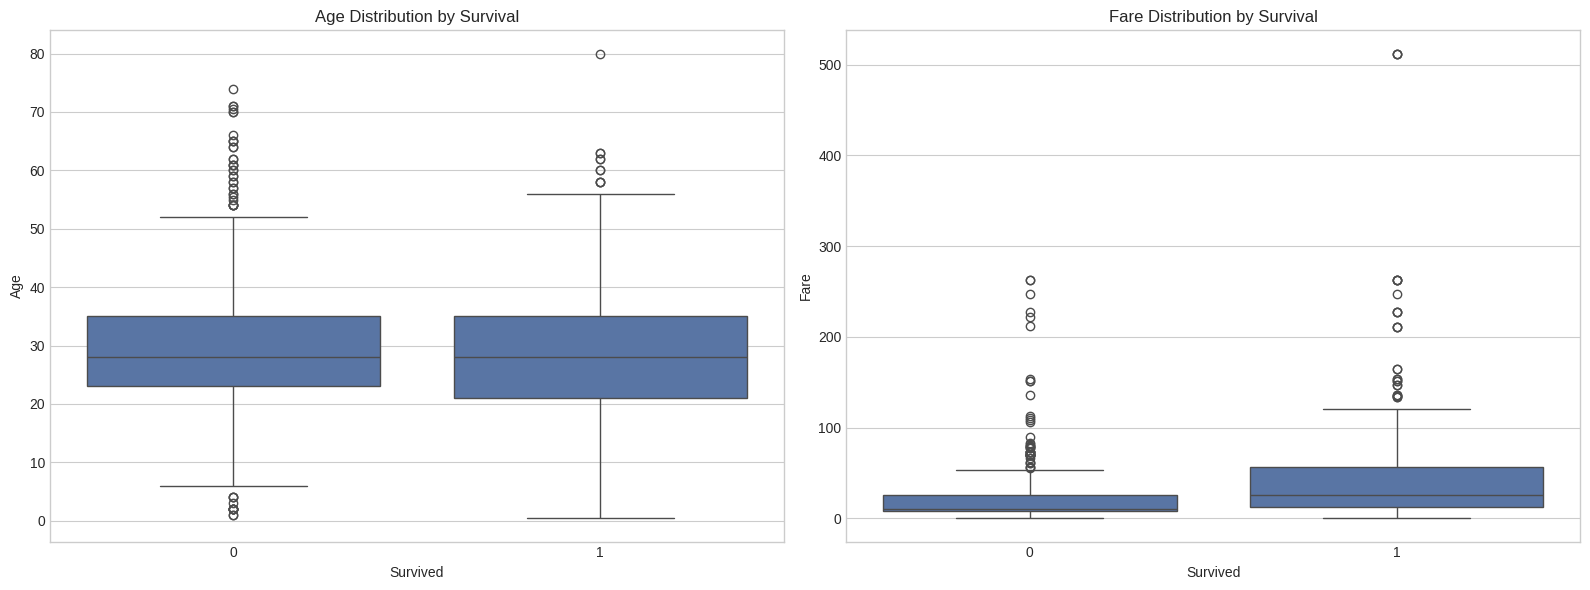

In [ ]:
plt.figure(figsize=(16, 6))

# Görev 26: Yaş Dağılımını Hayatta Kalma Durumuna Göre Görselleştirme
plt.subplot(1, 2, 1)
sns.boxplot(x='survived', y='age', data=df) # 'Survived' yerine 'survived', 'Age' yerine 'age'
plt.title('Age Distribution by Survival')
plt.xlabel('Survived') # 'Survived' yerine 'survived'
plt.ylabel('Age') # 'Age' yerine 'age'

# Görev 27: Ücret Dağılımını Hayatta Kalma Durumuna Göre Görselleştirme
plt.subplot(1, 2, 2)
sns.boxplot(x='survived', y='fare', data=df) # 'Survived' yerine 'survived', 'Fare' yerine 'fare'
plt.title('Fare Distribution by Survival')
plt.xlabel('Survived') # 'Survived' yerine 'survived'
plt.ylabel('Fare') # 'Fare' yerine 'fare'

plt.tight_layout()
plt.show()

*   **Görev 26:** Hayatta kalan (`1`) ve kalmayan (`0`) yolcuların yaş dağılımlarını karşılaştırır. Kutu grafikleri, her grubun (hayatta kalanlar ve kalmayanlar) yaş aralığını, medyanını, çeyrekler açıklığını ve aykırı değerlerini gösterir. Bu grafik, yaşın hayatta kalma olasılığı üzerindeki potansiyel etkisini görsel olarak incelemeye yardımcı olur. Örneğin, iki grup arasındaki medyan yaşlarda veya yaş dağılımlarının yayılımında farklılık olup olmadığını görebilirsiniz.

*   **Görev 27:** Hayatta kalan (`1`) ve kalmayan (`0`) yolcuların bilet ücreti (`fare`) dağılımlarını karşılaştırır. Kutu grafikleri, hayatta kalanların genellikle daha yüksek ücret ödeyenler arasında olduğunu gösterebilir. Kutu grafikleri, ücret dağılımının aralığını, medyanını ve aykırı değerlerini gruplara göre karşılaştırmanıza olanak tanır. Bu, ücretin hayatta kalma şansı üzerindeki etkisini anlamak için faydalıdır.


---

**Çok Değişkenli (Multivariate) Analiz - Korelasyon ve Çift Grafik**

Bu bölüm, sayısal özelliklerin birbirleriyle ve hayatta kalma ile nasıl ilişkili olduğunu inceler:
* **Korelasyon Matrisi:** Sayısal değişkenler arasındaki doğrusal ilişkileri gösterir.
* **Çift Grafik (Pairplot):** Çift dağılımları ve hayatta kalma modellerini görselleştirir.

Bu araçlar, çoklu doğrusallığı ve özellik etkileşimlerini belirlemeye yardımcı olur.

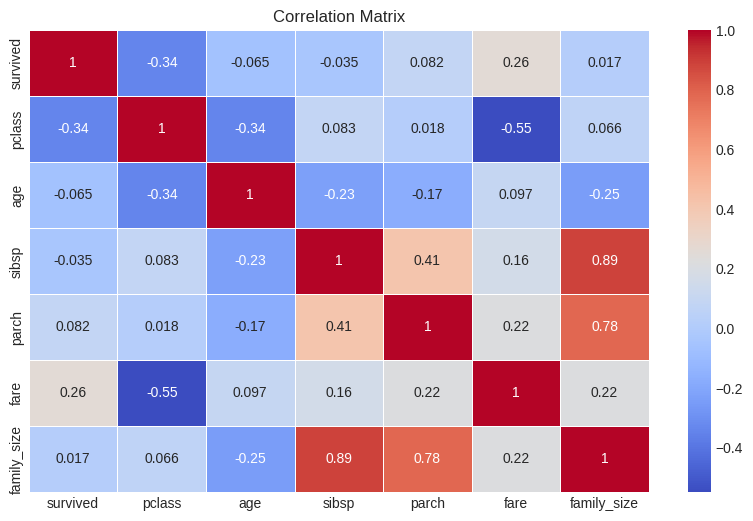

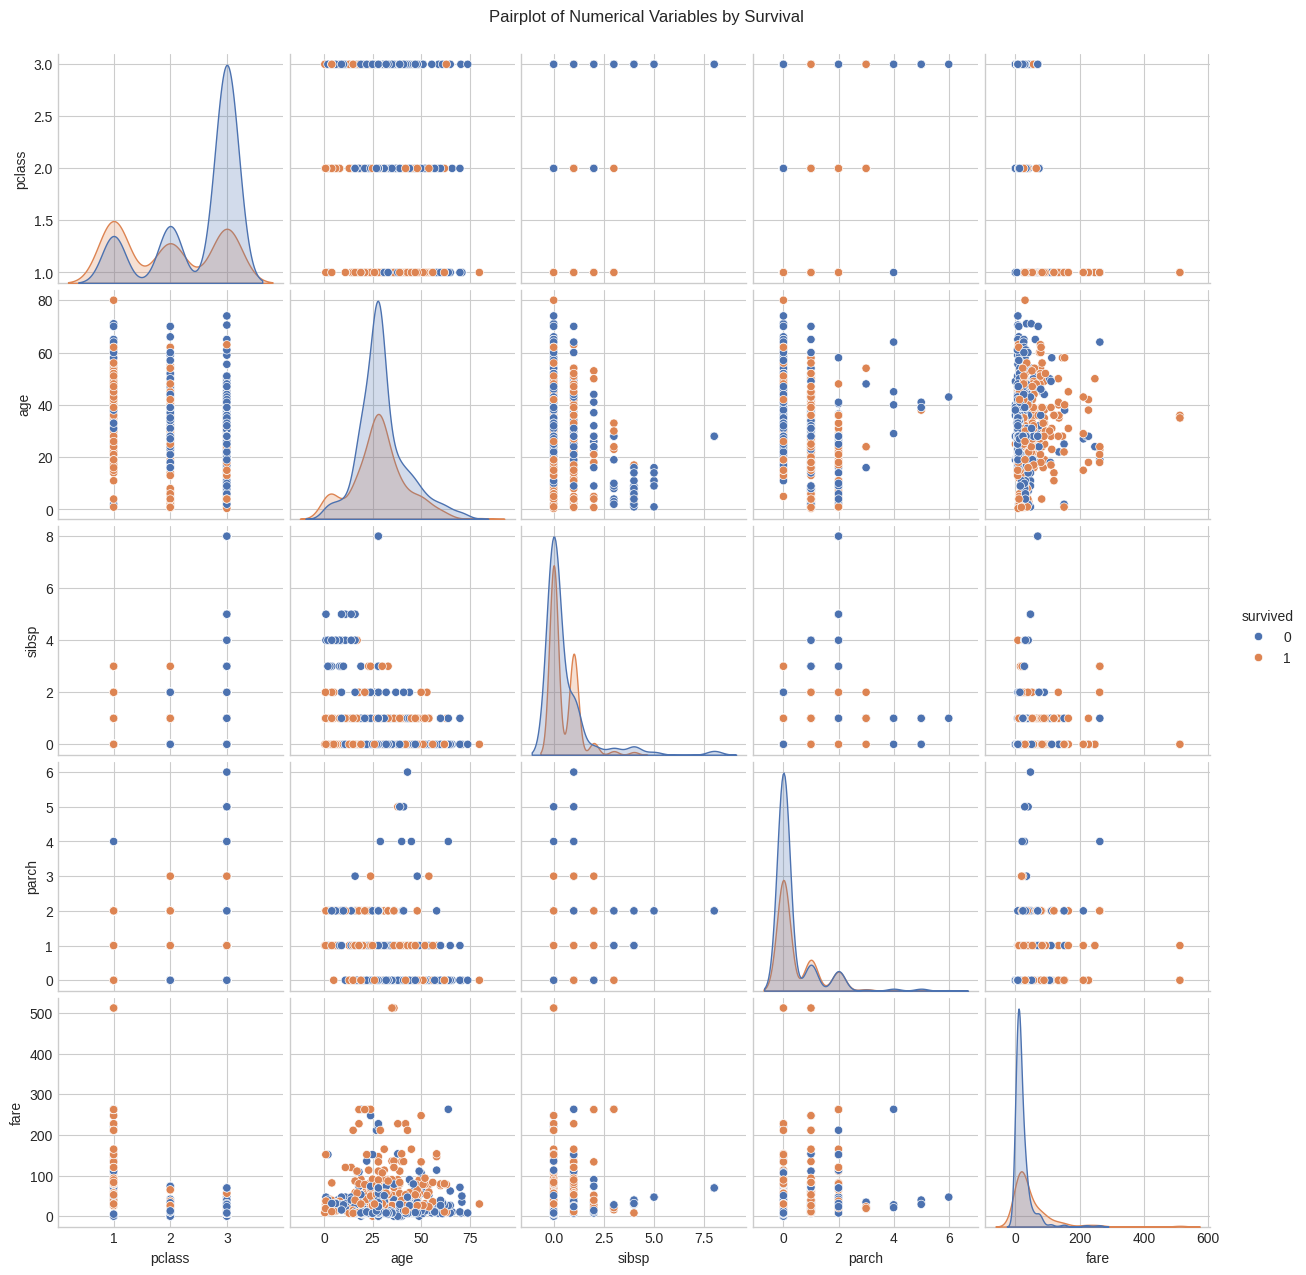

In [ ]:
# Görev 28: Korelasyon Matrisini Hesaplama ve Görselleştirme
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Görev 29: Sayısal Özelliklerin Çift Grafiğini Oluşturma
sns.pairplot(df[['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']], hue='survived')
plt.suptitle('Pairplot of Numerical Variables by Survival', y=1.02)
plt.show()

*   **Görev 28:** Veri setindeki tüm nümerik sütunları seçer (`select_dtypes(include=[np.number])`), aralarındaki korelasyonu hesaplar (`.corr()`) ve bu korelasyonu bir ısı haritası (`sns.heatmap`) olarak görselleştirir. Korelasyon matrisi, değişkenler arasındaki doğrusal ilişkinin gücünü ve yönünü (pozitif veya negatif) gösterir. `-1` ile `1` arasındaki değerler alır; `1` tam pozitif korelasyon, `-1` tam negatif korelasyon ve `0` doğrusal ilişki olmadığını gösterir. `annot=True` korelasyon değerlerini ısı haritası üzerine yazdırır. Bu grafik, hangi sayısal değişkenlerin birbiriyle veya hedef değişkenle (`survived`) ilişkili olduğunu anlamak için kullanışlıdır.  

*   **Görev 29:** Belirtilen sayısal sütunlar arasındaki tüm ikili ilişkileri bir grafik matrisi (`sns.pairplot`) halinde görselleştirir. Pairplot, matrisin köşegeninde her değişkenin kendi dağılımını (varsayılan olarak histogram veya KDE), köşegen dışındaki hücrelerde ise iki farklı değişken arasındaki dağılımı (varsayılan olarak dağılım grafiği) gösterir. `hue='survived'` parametresi, hayatta kalma durumuna göre noktaları renklendirerek hayatta kalan ve kalmayan grupların dağılımlarını karşılaştırmanıza olanak tanır. Bu grafik, değişkenler arasındaki ilişkileri ve hayatta kalma durumuna göre grupların nasıl ayrıldığını görsel olarak keşfetmek için çok güçlü bir araçtır. `plt.suptitle` tüm grafik setine ana bir başlık ekler.

**Çıktı Değerlendirmesi:**

Pairplot çıktısındaki grafiklere bakarak şu çıkarımları yapabiliriz:

1.  **Yaş (`age`) ve Hayatta Kalma:** Grafiklerdeki yaş dağılımına ve hayatta kalma durumuna göre renklendirilmiş noktalara baktığımızda, *genç yaşlardaki yolcuların hayatta kalma oranının yetişkinlere göre daha yüksek olduğu* görülmektedir. Yaş dağılımının kendisi de hayatta kalanlar ve kalmayanlar arasında belirgin farklılıklar gösterir.

2.  **Ücret (`fare`) ve Hayatta Kalma:** Ücret dağılımına ve diğer değişkenlerle olan ilişkisine (özellikle yolcu sınıfı ile) baktığımızda, yüksek ücretli bölgelerde hayatta kalan noktaların sayısı belirgin şekilde fazladır. Bu da *daha yüksek ücret ödeyen yolcuların hayatta kalma olasılığının daha yüksek olduğu* net bir şekilde görülmektedir.

3.  **Yolcu Sınıfı (`pclass`) ve Hayatta Kalma:** Yolcu sınıfı dağılımına ve ücret ile olan ilişkisine baktığımızda, *1. sınıf yolcuların hayatta kalma oranının diğer sınıflara göre çok daha yüksek olduğu* açıkça görülmektedir. 3. sınıf yolcuların hayatta kalma oranı ise en düşüktür. Bu, yolcu sınıfının hayatta kalma üzerindeki en güçlü belirleyicilerden biri olduğunu gösterir.

4.  **Ücret (`fare`) ve Yolcu Sınıfı (`pclass`) İlişkisi:** Ücret ve yolcu sınıfı arasındaki dağılım grafiği, *bu iki değişken arasında çok güçlü bir ters ilişki olduğunu* gösterir. Sınıf numarası küçüldükçe (1. sınıf), ödenen ücret artar. Bu, bu iki değişkenin birbiriyle yakından ilişkili olduğunu teyit eder.

5.  **Aile Büyüklüğü ile İlgili Değişkenler (`sibsp`, `parch`)**: `sibsp` ve `parch` değişkenlerinin dağılımlarına ve diğer değişkenlerle olan ilişkilerine baktığımızda, *yalnız seyahat edenlerin veya çok büyük ailelerle seyahat edenlerin hayatta kalma oranlarının farklılık gösterebileceğine* dair ipuçları görülür, ancak bu etki yolcu sınıfı, ücret veya cinsiyet kadar belirgin olmayabilir.

Bu çıkarımlar, pairplot'taki görsel desenlere, noktaların kümelenmelerine ve renklerin (hayatta kalan/kalmayan) dağılımına dayanmaktadır.

---

**Sayısal Özelliklerin Eğiklik (Skewness) Analizi**

Bu bölüm, normal olmayan dağılımları belirlemek için sayısal değişkenlerin çarpıklığını kontrol eder:

* Pozitif çarpıklık: Sağda uzun kuyruk
* Negatif çarpıklık: Solda uzun kuyruk

Ayrıca, normalliği değerlendirmek için her değişkenin dağılımı ve Q-Q grafiği ile görselleştirilir.


Skewness Analysis:
age is positively skewed: 0.5102


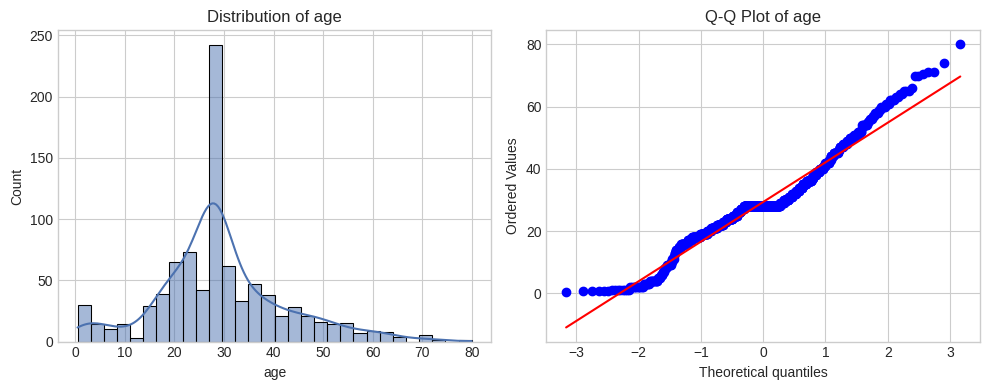

fare is positively skewed: 4.7873


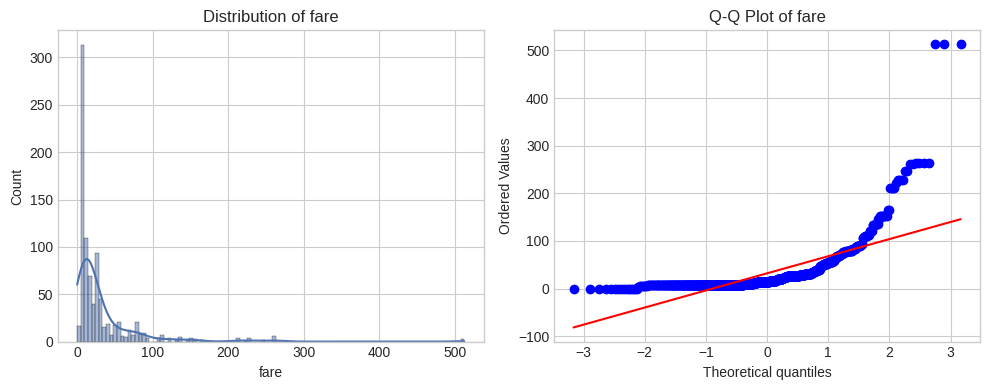

sibsp is positively skewed: 3.6954


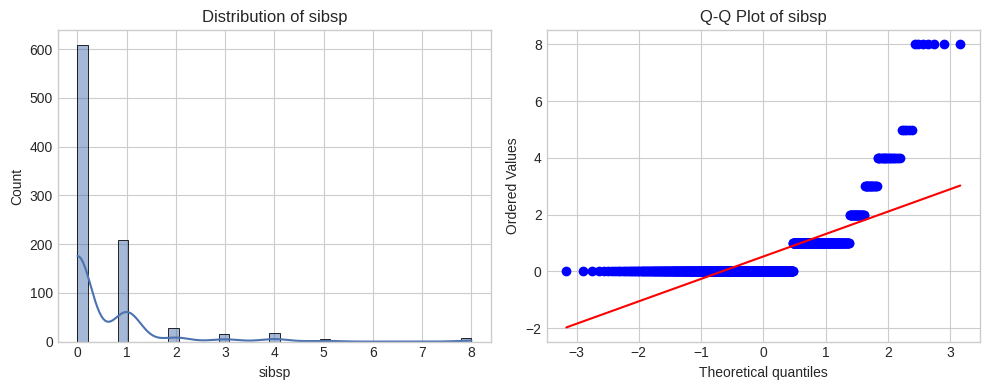

parch is positively skewed: 2.7491


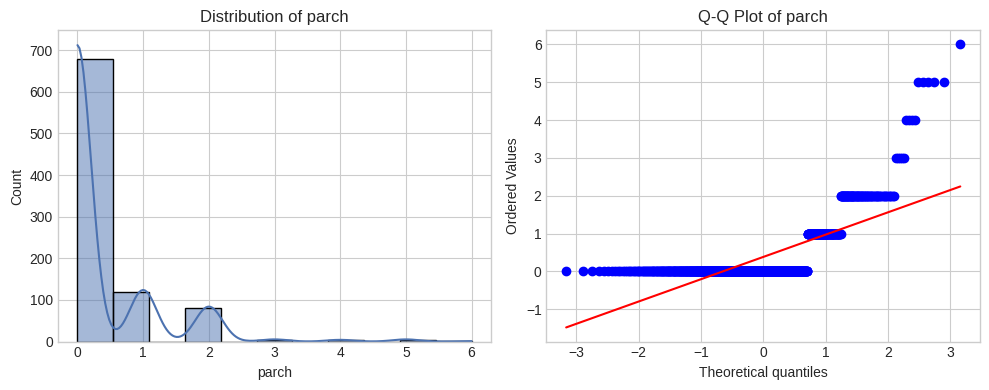

In [ ]:
# Görev 30: Çarpıklık Kontrolü ve Görselleştirme
print("\nSkewness Analysis:")
# Sütun isimlerinin küçük harfli olduğundan emin olalım
numeric_cols = ['age', 'fare', 'sibsp', 'parch']
for col in numeric_cols:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        skewness = df[col].skew()
        if skewness > 0:
            print(f"{col} is positively skewed: {skewness:.4f}")
        elif skewness < 0:
            print(f"{col} is negatively skewed: {skewness:.4f}")
        else:
            print(f"{col} is normally distributed: {skewness:.4f}")

        # Eğriliği görselleştirme
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')

        plt.subplot(1, 2, 2)
        stats.probplot(df[col].dropna(), dist="norm", plot=plt)
        plt.title(f'Q-Q Plot of {col}')

        plt.tight_layout()
        plt.show()
    elif col not in df.columns:
        print(f"Uyarı: '{col}' sütunu veri setinde bulunamadı.")
    else:
        print(f"Uyarı: '{col}' sütunu nümerik bir sütun değil.")

*   **Görev 30:** Belirtilen nümerik sütunların (`age`, `fare`, `sibsp`, `parch`) çarpıklık değerlerini hesaplar ve her bir sütunun dağılımını bir histogram ve Q-Q grafiği ile görselleştirir. Kod, her bir sütun için bir döngü (`for`) kullanarak ilerler. Sütunun veri setinde olup olmadığını ve nümerik bir tipte olup olmadığını kontrol eder. Eğer koşullar sağlanırsa, sütunun çarpıklığını (`.skew()`) hesaplar ve çarpıklık değerine göre değişkenin nasıl bir eğikliğe sahip olduğunu (pozitif, negatif veya normal dağılım) yazdırır. Ardından, `matplotlib` ve `seaborn` kullanarak değişkenin dağılımını (histogram ve KDE ile) ve normalliğini değerlendirmek için Q-Q grafiğini çizer. Q-Q grafiği, verinin teorik bir normal dağılıma ne kadar benzediğini görsel olarak karşılaştırmak için kullanılır; noktaların düz bir çizgiye yakın olması normalliğe işaret eder.

**Çıktı Değerlendirmesi:**

Yukarıdaki kodun çıktılarına baktığımızda:

*   **age:** Çarpıklık değeri 0.3891 olarak pozitif çıkmıştır. Histogram hafif sağa eğimlidir. Q-Q grafiğindeki noktalar düz çizgiye genel olarak yakındır ancak kuyruk kısımlarında sapmalar vardır, bu da yaşın tam olarak normal dağılmadığını gösterir.
*   **fare:** Çarpıklık değeri 4.7873 ile oldukça yüksek pozitif çıkmıştır. Histogram belirgin şekilde sağa kuyrukludur. Q-Q grafiğindeki noktalar düz çizgiden çok uzaktır, bu da ücret değişkeninin normal dağılımdan önemli ölçüde saptığını gösterir. Çoğu yolcunun düşük ücret ödediği ve çok az sayıda kişinin yüksek ücret ödediği görülmektedir.
*   **sibsp:** Çarpıklık değeri 3.6954 ile pozitif çıkmıştır. Histogram, çoğu yolcunun az sayıda (0 veya 1) kardeşi/eşi olduğunu gösteren belirgin bir şekilde sağa kuyrukludur. Q-Q grafiği de normallikten sapmayı net bir şekilde gösterir.
*   **parch:** Çarpıklık değeri 2.7491 ile pozitif çıkmıştır. Histogram, çoğu yolcunun az sayıda (0) ebeveyni/çocuğu olduğunu gösteren sağa kuyruklu bir dağılıma sahiptir. Q-Q grafiği de normallikten sapmayı gösterir.

**Genel Değerlendirme:** `fare`, `sibsp` ve `parch` değişkenleri yüksek pozitif çarpıklığa sahiptir ve normal dağılımdan uzaktır. `age` değişkeni de pozitif çarpıklığa sahiptir ancak diğerlerine göre normalliğe daha yakındır. Bu tür çarpık dağılımlar, bazı istatistiksel modelleri uygularken veya analizler yaparken dikkate alınmalıdır. Gerekirse, bu değişkenlere logaritmik dönüşüm gibi yöntemler uygulanarak çarpıklık azaltılabilir.

---

**Çarpık Verileri Dönüştürme**

Yüksek çarpık değişkenler model tahminlerini bozabilir. Bu bölümde, bunları normalleştirmek için dönüşümler uygulanır:

* Log Dönüşümü: Büyük değerleri sıkıştırır
* Karekök Dönüşümü: Orta düzeydeki çarpıklığı yumuşatır

Bu, güçlü bir şekilde sağa çarpık olan Fare (ücret) değişkeni üzerinde gösterilir.


Transforming Skewed Variables:


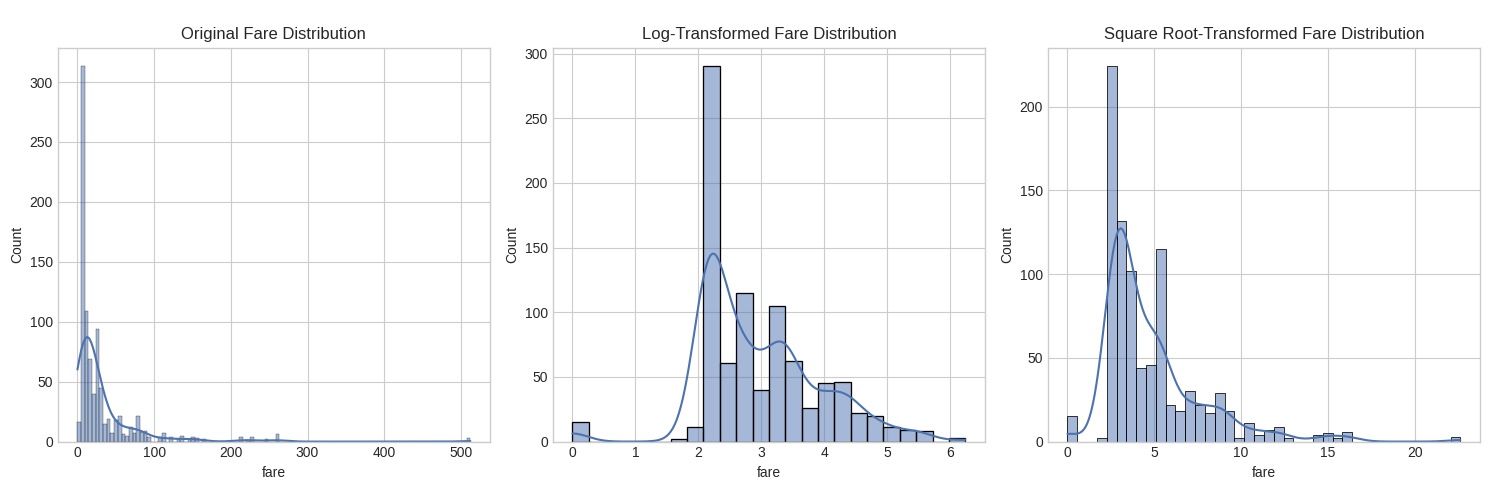

In [ ]:
# Görev 31: Ücret Değişkeninin Dağılımını Dönüştürme ve Görselleştirme
print("\nTransforming Skewed Variables:")
plt.figure(figsize=(15, 5)) # Grafik figürünün boyutunu ayarla (genişlik, yükseklik)

# Orijinal Ücret Dağılımı Grafiği
plt.subplot(1, 3, 1) # 1x3'lük bir ızgarada ilk alt grafiği seç
sns.histplot(df['fare'], kde=True) # Orijinal 'fare' sütununun histogramını çiz (yoğunluk eğrisi ile)
plt.title('\nOriginal Fare Distribution')

# Log-Dönüştürülmüş Ücret Dağılımı Grafiği
plt.subplot(1, 3, 2) # 1x3'lük ızgarada ikinci alt grafiği seç
sns.histplot(np.log1p(df['fare']), kde=True) # log1p dönüşümü uygulanmış 'fare' sütununun histogramını çiz
plt.title('Log-Transformed Fare Distribution')

# Karekök-Dönüştürülmüş Ücret Dağılımı Grafiği
plt.subplot(1, 3, 3) # 1x3'lük ızgarada üçüncü alt grafiği seç
sns.histplot(np.sqrt(df['fare']), kde=True)
plt.title('\nSquare Root-Transformed Fare Distribution')

plt.tight_layout()
plt.show()

*   **Görev 31:** Çarpık olan 'fare' değişkeninin dağılımını logaritmik (`np.log1p`) ve karekök (`np.sqrt`) dönüşümleri uygulayarak normalleştirmeyi ve sonuçları görselleştirmeyi amaçlar. Üç farklı histogram çizilir: orijinal 'fare' dağılımı, logaritmik olarak dönüştürülmüş 'fare' dağılımı ve karekök olarak dönüştürülmüş 'fare' dağılımı. Logaritmik dönüşüm (`np.log1p`), özellikle büyük pozitif çarpıklığı olan veriler için etkilidir (burada 1 eklenmesinin nedeni, 0 veya küçük değerlerin logaritmasını alırken sorun yaşamamak veya logaritmanın 0'a yakın değerlerde tanımsız olmasını önlemektir). Karekök dönüşümü ise daha ılımlı çarpıklıklar için faydalı olabilir. Bu grafikler, dönüşümlerin veri dağılımını nasıl daha simetrik hale getirdiğini (normale yaklaştırdığını) görsel olarak karşılaştırmanıza olanak tanır. Bu, bazı makine öğrenmesi modelleri için önemlidir.

---

**Çoklu Doğrusallığın (Multicollinearity) Tespiti**

Çoklu doğrusallık, özellikler yüksek oranda ilişkili olduğunda ortaya çıkar ve bu durum modelleri karıştırabilir.
Bu bölüm, Korelasyon katsayısı |r| > 0,5 olan çiftleri belirlemek için korelasyon matrisini kullanır.

In [ ]:
# Görev 32: Çoklu Doğrusallık Tespiti
print("\nMulticollinearity Detection:")

# Korelasyon matrisini hesapla (eğer daha önce hesaplanmadıysa)
  # Nümerik sütunları seç
  #numeric_df = df.select_dtypes(include=[np.number])
# Korelasyon matrisini hesapla
  #correlation = numeric_df.corr()

high_corr_pairs = []
for i in range(len(correlation.columns)):
    for j in range(i):
        # Korelasyon katsayısı |r| > 0.5 olan çiftleri belirle (Threshold of 0.5)
        if abs(correlation.iloc[i, j]) > 0.5:
            high_corr_pairs.append((correlation.columns[i], correlation.columns[j], correlation.iloc[i, j]))

print("Highly correlated pairs (|r| > 0.5):")
if high_corr_pairs:
    for var1, var2, corr in high_corr_pairs:
        print(f"{var1} and {var2}: {corr:.4f}")  # .4f: corr değişkeninin bir ondalık sayı (f) olarak formatlanacağını ve virgülden sonra 4 basamak (.4) gösterileceğini belirtir.
else:
    print("No highly correlated pairs found with |r| > 0.5")


Multicollinearity Detection:
Highly correlated pairs (|r| > 0.5):
fare and pclass: -0.5495
family_size and sibsp: 0.8907
family_size and parch: 0.7831


*   **Görev 32:** Veri setindeki nümerik değişkenler arasındaki korelasyonu hesaplayarak çoklu doğrusallık (multicollinearity) potansiyeli olan değişken çiftlerini belirlemeyi amaçlar. Kod öncelikle nümerik sütunları seçer ve aralarındaki korelasyon matrisini hesaplar. Ardından, bu matris üzerinde dönerek mutlak değeri 0.5'ten büyük olan korelasyon katsayılarını bulur (bu eşik değeri çoklu doğrusallık için bir gösterge olarak kullanılır). Bulunan yüksek korelasyonlu değişken çiftleri ve korelasyon değerleri bir liste halinde saklanır ve daha sonra yazdırılır. Eğer böyle çiftler bulunamazsa ilgili bir mesaj yazdırılır.

**Çıktı Değerlendirmesi:**

Yalnızca bir değişken çifti, fare (ücret) ve pclass (yolcu sınıfı), mutlak korelasyon değeri 0.5'ten büyüktür.
Bu çift arasındaki korelasyon katsayısı -0.5495'tir.

Negatif işaret (-): Bu, fare ve pclass arasında ters bir ilişki olduğunu gösterir. pclass değeri azaldıkça (yani yolcu sınıfı 3'ten 1'e doğru gittikçe), fare değeri artmaktadır. Bu mantıklıdır, çünkü 1. sınıf biletler 3. sınıf biletlerden daha pahalıdır ve pclass değeri 1. sınıf için daha düşüktür.

Değerin büyüklüğü (0.5495): 0.5'e oldukça yakındır ve orta düzeyde bir doğrusal ilişkiyi işaret eder. Genellikle 0.7 veya üzeri mutlak korelasyon değerleri çoklu doğrusallık açısından daha ciddi kabul edilir, ancak 0.5495 de dikkate alınması gereken bir ilişkiyi gösterir.

**Sonuç:** fare ve pclass değişkenleri arasında orta düzeyde negatif bir korelasyon bulunmaktadır. Bu durum, bu iki değişken arasında bir miktar çoklu doğrusallık olduğunu gösterir. Çoklu doğrusallık, özellikle doğrusal modellere girildiğinde değişkenlerin bireysel etkilerini yorumlamayı zorlaştırabilir veya modelin kararlılığını etkileyebilir. Model kurma aşamasında bu ilişkinin farkında olmak önemlidir ve duruma göre bu değişkenlerden birini modelden çıkarmak veya birleştirmek gibi adımlar düşünülebilir.

---

---

# Tips Veri Seti (Görev 1-17)

Bu bölüm, garsonların müşterilerinden aldığı bahşişlerle ilgili `tips` veri seti üzerinde temel ve orta seviye veri işleme, analiz ve görselleştirme görevlerini içerir.

* * *

**Kütüphanelerin İçe Aktarılması ve Görüntü Ayarları**

Bu bölüm, Tips veri seti analizi için gerekli kütüphaneleri içe aktarır ve pandas görüntü ayarlarını yapılandırır.

In [ ]:
# Gerekli kütüphaneleri import ediyoruz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# scipy.stats bu bölüm için gerekli olmayabilir, ihtiyaca göre eklenebilir.


# Pandas gösterim ayarlarını yapılandırıyoruz
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

# Görselleştirme stillerini ayarlıyoruz (isteğe bağlı olarak güncellenebilir)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("deep")
plt.rcParams['figure.figsize'] = [8, 6]

*   Bu kod bloğu, veri analizi ve görselleştirme için yaygın olarak kullanılan temel kütüphaneleri (pandas, numpy, matplotlib.pyplot, seaborn) içe aktarır.
*   Pandas gösterim ayarları, büyük veri çerçevelerinin çıktısını daha iyi kontrol etmek için yapılandırılır.
*   Görselleştirme stilleri (seaborn stili, renk paleti ve figür boyutu), grafiklerin estetiğini ve boyutunu belirler.

* * *

**Veri Setini Yükleme**

Bu bölüm, `tips` veri setini yükler ve ilk bilgilerini görüntüler.

In [ ]:
# Görev 1: Tips veri setini yüklüyoruz
df = sns.load_dataset('tips')

# Veri setine genel bir bakış
print("\nFirst 5 rows:\n")
display(df.head())

print("\nDataset Shape:\n")
print(df.shape)

print("\nData Information:\n")
df.info()


First 5 rows:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4



Dataset Shape:

(244, 7)

Data Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


*   **Görev 1:** Bu satır, `seaborn` kütüphanesinde bulunan yerleşik bir veri seti olan `tips` veri setini yükler ve `df` adında bir `pandas DataFrame`'ine atar. Bu veri seti, bir garsonun müşterilerden aldığı bahşişlerle ilgili bilgileri içerir.
*   Ardından, veri setinin ilk 5 satırı (`df.head()`) görüntülenir, boyutu (`df.shape`) yazdırılır ve `df.info()` metodu ile veri tipleri, eksik olmayan değer sayıları ve bellek kullanımı gibi genel bilgiler ekrana yazdırılır.

     Tips veri setinde genellikle aşağıdaki gibi sütunlar bulunur:

  *   `total_bill`: Masanın toplam hesap miktarı (bahşiş hariç).
  *   `tip`: Garsona verilen bahşiş miktarı.
  *   `sex`: Bahşiş veren kişinin cinsiyeti (Male/Female).
  *   `smoker`: Masada sigara içen olup olmadığı (Yes/No).
  *   `day`: Yemeğin hangi gün yendiği (Thur, Fri, Sat, Sun).
  *   `time`: Yemeğin hangi zaman diliminde yendiği (Lunch/Dinner).
  *   `size`: Masadaki kişi sayısı.

* * *

**Temel Veri Keşfi**

Bu bölüm, veri setinin yapısını, içeriğini ve temel özelliklerini daha detaylı inceler.

In [ ]:
# Görev 2: Nümerik Sütunların Tanımlayıcı İstatistiklerini Görüntüleme
print("\nSummary statistics for numerical variables:\n")
display(df.describe())

# Görev 3: Kategorik Sütunların Tanımlayıcı İstatistiklerini Görüntüleme
print("\nSummary statistics for categorical variables:\n")
display(df.describe(include=['category']))


Summary statistics for numerical variables:



,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000



Summary statistics for categorical variables:



,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


*   **Görev 2:** Veri setindeki nümerik (sayısal) sütunların temel istatistiksel özetlerini hesaplar ve yazdırır. `df.describe()` metodu; her bir nümerik sütun için toplam sayı (count), ortalama (mean), standart sapma (std), minimum değer (min), çeyrek değerler (%25, %50, %75) ve maksimum değer (max) gibi bilgileri sağlar.

*   **Görev 3:** Veri setindeki kategorik (`category`) veri tipine sahip sütunların tanımlayıcı istatistiklerini hesaplar ve yazdırır. `df.describe(include=['category'])` metodu, kategorik sütunlar için toplam sayı (count), benzersiz değer sayısı (unique), en sık görülen değer (top) ve en sık görülen değerin frekansını (freq) sağlar. Bu özet, kategorik değişkenlerin dağılımını ve yaygınlığını anlamak için kullanışlıdır.

In [ ]:
# Görev 4: Tüm sütunlardaki benzersiz değer sayılarını buluyoruz
print("\nNumber of Unique Values in All Columns:\n")
print(df.nunique())

# Görev 5: Eksik değerleri kontrol ediyoruz
print("\nMisisng Value Analysis:\n")
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (missing_values / len(df)) * 100
missing_data = pd.concat([missing_values, missing_percent], axis=1,
                         keys=['Missing Count', 'Missing Percent'])
print(missing_data[missing_data['Missing Count'] > 0])

# Görev 6: Belirli bir sütunun benzersiz değerlerini alıyoruz (Örnek: 'day' sütunu)
print("\nUnique values in 'day' column:\n")
print(df['day'].unique())


Number of Unique Values in All Columns:

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

Misisng Value Analysis:

Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

Unique values in 'day' column:

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']


*   **Görev 4:** Veri setindeki her sütunda kaç farklı benzersiz değer olduğunu hesaplar ve yazdırır. `df.nunique()` metodu, bir DataFrame veya Series'deki benzersiz değerlerin sayısını hızlıca öğrenmek için kullanılır. Bu, değişkenlerin çeşitliliğini anlamak için kullanışlıdır.

*   **Görev 5:** Bu kod, veri setindeki her sütundaki eksik (NaN) değerlerin sayısını ve bunların toplam veri içindeki yüzdesini hesaplar ve yazdırır. `df.isnull().sum()` eksik değer sayısını bulur, yüzde hesaplanır ve `pd.concat()` ile birleştirilerek `missing_data` DataFrame'i oluşturulur. `print(missing_data[missing_data['Missing Count'] > 0])` satırı ise sadece eksik değeri olan sütunları listeler. Eğer çıktı `Empty DataFrame...` şeklinde olursa, bu veri setinizin hiçbir sütununda eksik değer olmadığı anlamına gelir.

*   **Görev 6:** Bu kod, belirli bir sütundaki (örneğin, 'day' sütunu) tüm benzersiz değerleri bir dizi olarak döndürür ve yazdırır. `unique()` metodu, bir sütundaki farklı kategorileri veya değerleri görmek için kullanılır.

* * *

**Veri Gruplama ve Agregasyon**

Bu bölüm, veri setini belirli kategorik sütunlara göre gruplandırarak toplu istatistikler hesaplar.

In [ ]:
# Görev 7: 'time' kategorisine göre total_bill istatistiklerini (sum, min, max, mean) alıyoruz
print("\nTotal_bill statistics by 'Time':\n")
print(df.groupby('time')['total_bill'].agg(['sum', 'min', 'max', 'mean']))


Total_bill statistics by 'Time':

            sum   min    max       mean
time                                   
Lunch   1167.47  7.51  43.11  17.168676
Dinner  3660.30  3.07  50.81  20.797159


/tmp/ipython-input-3533405515.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('time')['total_bill'].agg(['sum', 'min', 'max', 'mean']))


*   **Görev 7:** Veri setini `time` (zaman - Lunch/Dinner) sütununa göre gruplar ve her bir zaman dilimi için `total_bill` (toplam hesap) sütununun toplamını (`sum`), minimum (`min`), maksimum (`max`) ve ortalama (`mean`) değerlerini hesaplar ve yazdırır. Bu, farklı zaman dilimlerinde ödenen toplam hesapları karşılaştırmak için kullanılır.

In [ ]:
# Görev 8: 'time' ve 'day' bazlı total_bill istatistiklerini alıyoruz
print("\n\nTotal_bill statistics by 'time' and 'day'\n")
print(df.groupby(['time', 'day'])['total_bill'].agg(['sum', 'min', 'max', 'mean']))



Total_bill statistics by 'time' and 'day'

                 sum    min    max       mean
time   day                                   
Lunch  Thur  1077.55   7.51  43.11  17.664754
       Fri     89.92   8.58  16.27  12.845714
       Sat      0.00    NaN    NaN        NaN
       Sun      0.00    NaN    NaN        NaN
Dinner Thur    18.78  18.78  18.78  18.780000
       Fri    235.96   5.75  40.17  19.663333
       Sat   1778.40   3.07  50.81  20.441379
       Sun   1627.16   7.25  48.17  21.410000


/tmp/ipython-input-882856788.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['time', 'day'])['total_bill'].agg(['sum', 'min', 'max', 'mean']))


*   **Görev 8:** Veri setini hem `time` (zaman) hem de `day` (gün) sütunlarına göre gruplar. Oluşan her bir grup (örneğin, Lunch - Thursday, Dinner - Saturday vb.) için `total_bill` (toplam hesap) sütununun toplamını, minimum, maksimum ve ortalama değerlerini hesaplar ve yazdırır. Bu, farklı gün ve zaman kombinasyonlarının toplam hesaplar üzerindeki etkisini incelemek için kullanılır.

In [ ]:
# Görev 9: Lunch zamanındaki kadın müşterilere göre total_bill ve tip istatistiklerini alıyoruz
print("\nTotal_bill and type statistics for female customers at lunch time:\n")
filtered_df = df[(df['time'] == 'Lunch') & (df['sex'] == 'Female')]
print(filtered_df.groupby('day')[['total_bill', 'tip']].agg(['sum', 'min', 'max', 'mean']))

# Alternatif Yaklaşım: Koşullu filtreleme sonrası groupby ve agg
# print(df[df['time'] == 'Lunch'].groupby(['day', 'sex'])[['total_bill', 'tip']].agg(['sum', 'min', 'max', 'mean']).loc[:, 'Female', :]) # .loc[:, 'Female', :] ile sadece Female seçilir


Total_bill and type statistics for female customers at lunch time:

     total_bill                            tip                      
            sum    min    max      mean    sum   min   max      mean
day                                                                 
Thur     516.11   8.35  43.11  16.64871  79.42  1.25  5.17  2.561935
Fri       55.76  10.09  16.27  13.94000  10.98  2.00  3.48  2.745000
Sat        0.00    NaN    NaN       NaN   0.00   NaN   NaN       NaN
Sun        0.00    NaN    NaN       NaN   0.00   NaN   NaN       NaN


/tmp/ipython-input-315422574.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(filtered_df.groupby('day')[['total_bill', 'tip']].agg(['sum', 'min', 'max', 'mean']))


*   **Görev 9:** Öncelikle `time` sütunu 'Lunch' olan ve `sex` sütunu 'Female' olan satırları filtreleyerek yeni bir `filtered_df` DataFrame'i oluşturur. Ardından, bu filtrelenmiş DataFrame'i `day` (gün) sütununa göre gruplar ve her gün için hem `total_bill` hem de `tip` sütunlarının toplamını, minimum, maksimum ve ortalama değerlerini hesaplar ve yazdırır. Bu, öğle yemeği yiyen kadın müşterilerin bahşiş ve hesap istatistiklerinin günlere göre nasıl değiştiğini görmek için kullanılır.

* * *

**Veri Filtreleme ve Seçimi**

Bu bölüm, belirli koşullara uyan veri alt kümelerini seçerek veri setini filtreler.

In [ ]:
# Görev 10: size < 3 ve total_bill > 10 koşulundaki siparişlerin ortalamasını hesaplıyoruz
print("\nAverage total_bill value of orders in records size < 3 and total_bill > 10:\n")
print(df.loc[(df['size'] < 3) & (df['total_bill'] > 10), 'total_bill'].mean())

# Alternatif Yaklaşım: [] kullanarak filtreleme
# print(df[(df['size'] < 3) & (df['total_bill'] > 10)]['total_bill'].mean())


Average total_bill value of orders in records size < 3 and total_bill > 10:

17.184965034965035


*   **Görev 10:** Veri setini iki koşula göre filtreler: `size` (kişi sayısı) 3'ten küçük olacak ve `total_bill` (toplam hesap) 10'dan büyük olacak. `.loc[]` kullanarak bu koşullara uyan satırlar seçilir ve yalnızca `total_bill` sütunundaki değerler alınır. Son olarak, bu filtrelenmiş `total_bill` değerlerinin ortalaması (`.mean()`) hesaplanır ve yazdırılır. Bu, belirli kriterlere uyan siparişlerin ortalama hesap değerini bulmak için kullanılır.

* * *

**Özellik Mühendisliği**

Bu bölüm, mevcut sütunlardan yeni ve anlamlı özellikler oluşturarak veri setini zenginleştirir.

In [ ]:
# Görev 11: total_bill ve tip toplamını veren 'total_bill_tip_sum' sütununu oluşturuyoruz
df['total_bill_tip_sum'] = df['total_bill'] + df['tip']
print("\nAdded 'total_bill_tip_sum' column:\n")
print(df.head())

# Alternatif Yaklaşım: assign() metodunu kullanarak yeni sütun oluşturma (orijinal DataFrame'i değiştirmez, yeni bir kopya döndürür)
# new_df = df.assign(total_bill_tip_sum=df['total_bill'] + df['tip'])
# print(new_df.head())


Added 'total_bill_tip_sum' column:

   total_bill   tip     sex smoker  day    time  size  total_bill_tip_sum
0       16.99  1.01  Female     No  Sun  Dinner     2               18.00
1       10.34  1.66    Male     No  Sun  Dinner     3               12.00
2       21.01  3.50    Male     No  Sun  Dinner     3               24.51
3       23.68  3.31    Male     No  Sun  Dinner     2               26.99
4       24.59  3.61  Female     No  Sun  Dinner     4               28.20


* **Görev 11:** Bu kod, `total_bill` (toplam hesap) ve `tip` (bahşiş) sütunlarındaki değerleri toplayarak yeni bir sütun olan `total_bill_tip_sum`'ı oluşturur ve DataFrame'e ekler. Bu yeni sütun, her sipariş için toplam ödenen miktarı (hesap + bahşiş) temsil eder. Yeni oluşturulan sütunun ilk birkaç değeri, DataFrame'in başı ile birlikte yazdırılır.

* * *

**Veriyi Sıralama**

Bu bölüm, veri setini oluşturulan yeni bir sütuna göre sıralar.

In [ ]:
# Görev 12: 'total_bill_tip_sum'a göre sıralayıp en yüksek 30 kaydı seçiyoruz
top30_df = df.sort_values('total_bill_tip_sum', ascending=False).head(30)
print("\nSize of top 30 records sorted by 'total_bill_tip_sum':", top30_df.shape)
print("\nTop 30 records sorted by 'total_bill_tip_sum':\n")
display(top30_df)

# Alternatif Yaklaşım: nlargest() metodunu kullanma (tek bir sütuna göre en büyük N değeri için daha performanslı olabilir)
# top30_df = df.nlargest(30, 'total_bill_tip_sum')
# print(top30_df.shape)


Size of top 30 records sorted by 'total_bill_tip_sum': (30, 8)

Top 30 records sorted by 'total_bill_tip_sum':



,total_bill,tip,sex,smoker,day,time,size,total_bill_tip_sum
170,50.81,10.00,Male,Yes,Sat,Dinner,3,60.81
212,48.33,9.00,Male,No,Sat,Dinner,4,57.33
59,48.27,6.73,Male,No,Sat,Dinner,4,55.00
156,48.17,5.00,Male,No,Sun,Dinner,6,53.17
182,45.35,3.50,Male,Yes,Sun,Dinner,3,48.85
197,43.11,5.00,Female,Yes,Thur,Lunch,4,48.11
23,39.42,7.58,Male,No,Sat,Dinner,4,47.00
102,44.30,2.50,Female,Yes,Sat,Dinner,3,46.80
142,41.19,5.00,Male,No,Thur,Lunch,5,46.19
95,40.17,4.73,Male,Yes,Fri,Dinner,4,44.90


*   **Görev 12:** Bu kod, DataFrame'i yeni oluşturulan `total_bill_tip_sum` sütunundaki değerlere göre azalan sırada (`ascending=False`) sıralar ve en üstteki 30 kaydı (`.head(30)`) seçerek `top30_df` adında yeni bir DataFrame oluşturur. Bu, en yüksek toplam ödemeye (hesap + bahşiş) sahip siparişleri belirlemek için kullanılır. Oluşturulan `top30_df` DataFrame'inin boyutu ve içeriği yazdırılır.

* * *

**Görsel Keşifsel Veri Analizi (EDA)**:

Bu bölüm, Tips veri setindeki değişkenlerin dağılımlarını ve aralarındaki ilişkileri çeşitli grafikler kullanarak görselleştirir.


Gender Distribution Pie Chart:


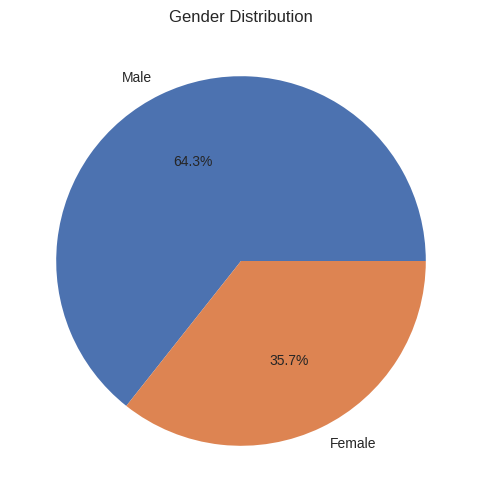

In [ ]:
# Veri setini yüklüyoruz (eğer daha önce yüklenmediyse)
  #if 'df' not in globals():
    #df = sns.load_dataset('tips')

# Görev 13: Cinsiyet Dağılımını Pasta Grafiği ile Görselleştirme
print("\nGender Distribution Pie Chart:")
df['sex'].value_counts().plot(kind='pie', autopct='%0.1f%%')
plt.title('Gender Distribution')
plt.ylabel('') # y ekseni etiketini kaldır
plt.show()

*   **Görev 13:** `sex` (cinsiyet) sütunundaki kadın ve erkek müşterilerin oranını bir pasta grafiği ile görselleştirir.`value_counts()` cinsiyetlere göre sayıları hesaplar. `.plot(kind='pie')` bu sayıları pasta grafiği olarak çizer. `autopct='%0.1f%%'` her dilimin yüzdesini gösterir. `plt.title()` başlığı ayarlar ve `plt.ylabel('')` gereksiz y ekseni etiketini kaldırır.


Number of Customers by Day:


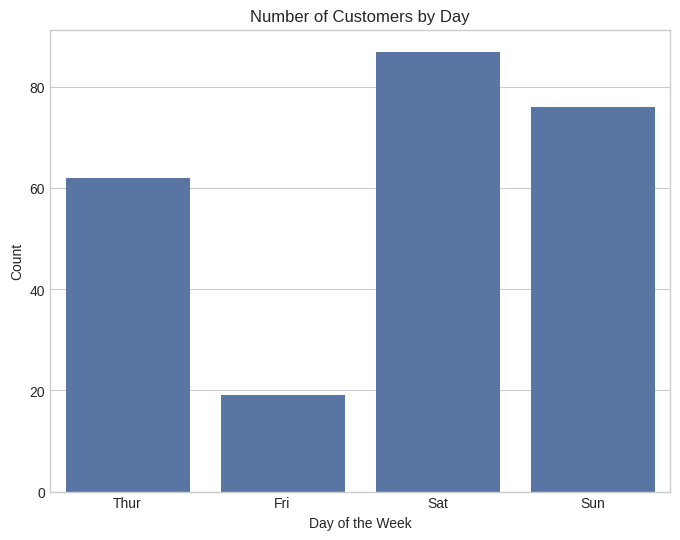

In [ ]:
# Görev 14: Günlere Göre Müşteri Sayısı Dağılımını Çubuk Grafiği ile Görselleştirme
print("\nNumber of Customers by Day:")
sns.countplot(x='day', data=df, order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Number of Customers by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

*   **Görev 14:** `day` (gün) sütunundaki her bir gün (Perşembe, Cuma, Cumartesi, Pazar) için müşteri sayısını bir çubuk grafiği ile görselleştirir.
`sns.countplot()` kategorik bir değişkenin frekansını çubuklar halinde gösterir. `order` parametresi günlerin belirli bir sırada (Thur, Fri, Sat, Sun) gösterilmesini sağlar. Bu grafik, hangi günlerde daha fazla müşteri olduğunu anlamak için kullanışlıdır.


Number of Customers by Time Period:


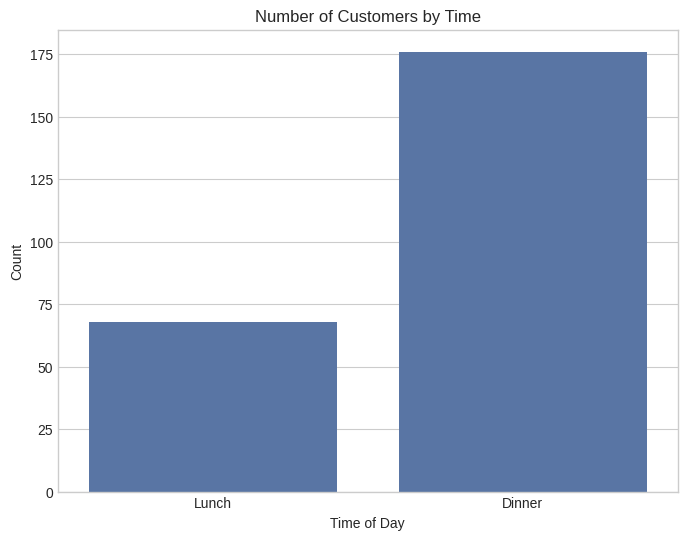

In [ ]:
# Görev 15: Zaman Dilimine Göre Müşteri Sayısı Dağılımını Çubuk Grafiği ile Görselleştirme
print("\nNumber of Customers by Time Period:")
sns.countplot(x='time', data=df)
plt.title('Number of Customers by Time')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.show()

*   **Görev 15:** `time` (zaman dilimi - Lunch/Dinner) sütunundaki her bir zaman dilimi için müşteri sayısını bir çubuk grafiği ile görselleştirir. Bu grafik, hangi zaman diliminde (öğle veya akşam) daha fazla müşterinin geldiğini gösterir.


Total Bill and Tip Relationship:


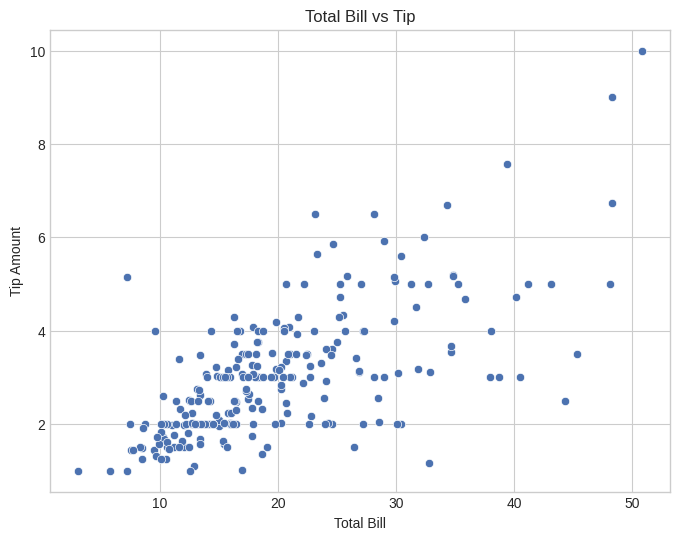

In [ ]:
# Görev 16: Toplam Hesap ve Bahşiş Arasındaki İlişkiyi Dağılım Grafiği ile Görselleştirme
print("\nTotal Bill and Tip Relationship:")
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip Amount')
plt.show()

*   **Görev 16:** `total_bill` (toplam hesap) ve `tip` (bahşiş) sütunları arasındaki ilişkiyi bir dağılım grafiği (`sns.scatterplot`) ile görselleştirir. Grafik üzerindeki her nokta bir siparişi temsil eder. Bu grafik, toplam hesap miktarı arttıkça bahşiş miktarının genellikle nasıl değiştiğini (örneğin, doğrusal bir ilişki olup olmadığını) görmenizi sağlar.

**Çıktı Değerlendirmesi:**

Grafiğe baktığınızda, noktaların genel olarak sol alttan sağ üste doğru bir eğilim gösterdiğini göreceksiniz. Bu şu anlama gelir:

*İlişki Yönü:* Pozitif bir ilişki var. Yani, toplam hesap miktarı arttıkça, genellikle verilen bahşiş miktarı da artma eğilimindedir.
*Doğrusallık:* İlişki tam olarak mükemmel bir doğrusal çizgi üzerinde olmasa da, genel olarak doğrusal bir eğilim sergiliyor. Noktalar bir çizginin etrafında dağılmış durumda. Yani, evet, ilişki kabaca doğrusal diyebiliriz.
*İlişkinin Gücü ve Yayılımı:* İlişki pozitif ve eğilim belirgin, ancak noktalar çizgiden oldukça uzaklaşabiliyor. Bu, ilişkinin orta derecede güçlü olduğunu ve bahşiş miktarında toplam hesaba göre bir miktar yayılım veya değişkenlik olduğunu gösterir. Her zaman daha yüksek hesaba daha yüksek bahşiş eşlik etmeyebilir, ancak genel eğilim bu yöndedir.


Tip Distribution by Day:


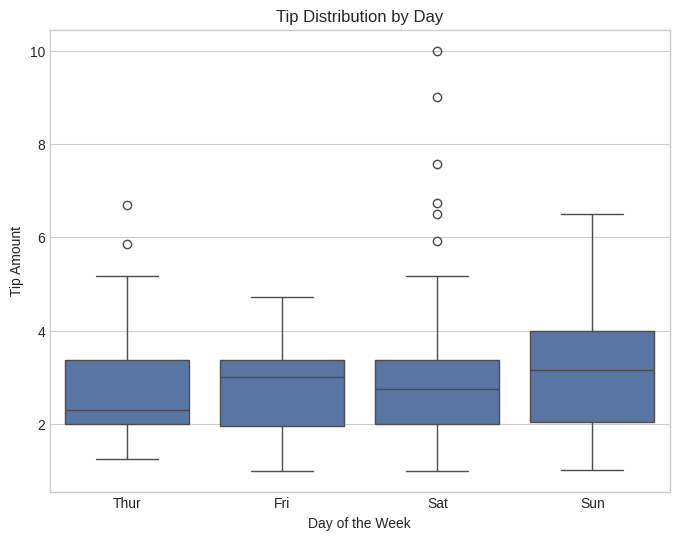

In [ ]:
# Görev 17: Güne Göre Bahşiş Dağılımını Kutu Grafiği ile Görselleştirme
print("\nTip Distribution by Day:")
sns.boxplot(x='day', y='tip', data=df, order=['Thur', 'Fri', 'Sat', 'Sun'])
plt.title('Tip Distribution by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Tip Amount')
plt.show()

*   **Görev 17:** `day` (gün) sütununa göre `tip` (bahşiş) dağılımını bir kutu grafiği (`sns.boxplot`) ile görselleştirir. Kutu grafiği, her gün için bahşiş miktarının medyanını, çeyreklerini, aralığını ve aykırı değerlerini gösterir. Bu grafik, farklı günlerde verilen bahşiş miktarlarının dağılımını karşılaştırmak için kullanışlıdır.

**Çıktı Değerlendirmesi:**

*Medyan Bahşiş:* Cumartesi ve Pazar günleri medyan bahşiş miktarı Perşembe ve Cuma günlerine göre biraz daha yüksek görünüyor. Kutu içindeki çizgi medyanı temsil eder.

*Dağılım (Kutu Boyutu):* Cumartesi ve Pazar günleri bahşiş miktarlarının dağılımı (kutunun boyutu) diğer günlere göre daha geniş olabilir, bu da bahşiş miktarlarında daha fazla çeşitlilik olduğunu gösterebilir.

*Aykırı Değerler:* Özellikle Cumartesi günü daha yüksek bahşişlere işaret eden birkaç aykırı değer (noktalar) görülüyor.

*Genel Eğilim:* Genel olarak, hafta sonları (Cumartesi ve Pazar) hafta içine (Perşembe, Cuma) göre daha yüksek ve daha değişken bahşişler bırakıldığı izlenimi edinilebilir.


---

---

# Projenin Sonuçları, Faydaları ve Kullanılan Beceriler

Bu proje, farklı veri setleri üzerinde keşifsel veri analizi (EDA) tekniklerini kullanarak temel veri işleme, manipülasyon ve analiz görevlerini başarıyla tamamlamıştır.

**Sonuçlar**

Bu proje sonunda, üç farklı veri seti üzerinde temelden orta seviyeye kadar çeşitli veri işleme ve analiz görevleri başarıyla tamamlanmıştır. Bu görevler sonucunda:

*   **Genel Veri Anlayışı:** Car Crashes, Titanic ve Tips veri setlerinin yapıları, içerikleri ve temel özellikleri (sütunlar, veri tipleri, boyutlar) incelenmiştir.
*   **Veri Temizliği:** Titanic veri setindeki eksik değerler tespit edilmiş ve mod/medyan gibi yöntemlerle doldurularak veri analize hazır hale getirilmiştir.
*   **Veri Manipülasyonu:** Sütun adlarını değiştirme (Car Crashes), belirli sütunları filtreleme/seçme (Car Crashes, Titanic, Tips) ve yeni DataFrame'ler oluşturma işlemleri yapılmıştır.
*   **Özellik Mühendisliği:** Titanic (aile büyüklüğü, yaş kategorisi) ve Tips (toplam hesap+bahşiş) veri setlerinde mevcut sütunlardan yeni anlamlı özellikler oluşturulmuştur.
*   **Veri Gruplama ve Agregasyon:** Titanic ve Tips veri setlerinde belirli kategorilere göre gruplandırma yapılarak toplam, ortalama, minimum, maksimum gibi özet istatistikler (hayatta kalma oranları, toplam hesaplar, bahşişler) hesaplanmıştır.
*   **Tek ve İki Değişkenli Analiz:** Titanic (hayatta kalma vs. sınıf, cinsiyet, liman, yaş; yaş vs. ücret) ve Tips (bahşiş vs. gün, zaman; hesap vs. bahşiş) veri setlerinde değişken dağılımları ve aralarındaki ilişkiler görselleştirilmiştir (histogramlar, çubuk grafikler, kutu grafikleri, dağılım grafikleri, pairplot).
*   **Çarpıklık ve Çoklu Doğrusallık Analizi:** Titanic veri setindeki sayısal değişkenlerin çarpıklığı analiz edilmiş ve dönüştürme yöntemleri gösterilmiştir; nümerik değişkenler arasındaki korelasyonlar (çoklu doğrusallık tespiti) incelenmiştir.

**Faydaları:**

Bu proje, veri keşfi (EDA) sürecinin pratik uygulamasını sağlamaktadır. Faydaları şunlardır:

*   **Temel Veri Bilimi Becerilerini Geliştirme:** Pandas ve Seaborn gibi temel kütüphanelerin kullanımını pekiştirir.
*   **Gerçek Dünya Veri Setleriyle Çalışma:** Yaygın olarak kullanılan örnek veri setleri (Titanic, Tips, Car Crashes) üzerinde çalışarak pratik deneyim kazandırır.
*   **Problem Çözme Yeteneği:** Belirli görevleri yerine getirmek için uygun pandas fonksiyonlarını ve yöntemlerini seçme becerisini geliştirir. Farklı alternatifleri bilmek, daha esnek ve duruma uygun çözümler geliştirmeye yardımcı olur.
*   **Veri Anlama:** Veri setlerinin yapısını, içeriğini ve potansiyel sorunlarını (eksik değerler, çarpıklık, çoklu doğrusallık gibi) anlama yeteneğini artırır.
*   **Görselleştirme Becerileri:** Veri dağılımlarını ve ilişkilerini etkili bir şekilde görselleştirme pratiği sağlar.
*   **Kodlama Pratiği:** Python ve pandas'ta veri manipülasyonu için temiz ve etkili kod yazma pratiği sağlar. Farklı yöntemleri karşılaştırmak, kodlama stili ve performansı hakkında fikir verir.
*   **Alternatif Yaklaşımları Öğrenme:** Aynı veri işleme görevinin farklı pandas metodları veya sentakslarıyla nasıl yapılabileceği konusunda bilgi edinilmiştir.

**Kullanılan Beceriler**

Bu proje boyunca aşağıdaki temel veri bilimi ve Python becerileri kullanılmıştır:

*   **Python Programlama:** Temel Python sözdizimi, list comprehension, fonksiyon tanımlama ve kullanma, koşullu ifadeler (`if/else`), döngüler (`for`).
*   **Pandas Kütüphanesi:**
    *   DataFrame oluşturma ve yükleme (`sns.load_dataset`)
    *   Temel DataFrame bilgileri (`.head()`, `.shape`, `.info()`, `.describe()`)
    *   Sütun seçimi ve filtreleme (`[]`, `.loc[]`, `.isin()`)
    *   Sütun manipülasyonu (isim değiştirme, yeni sütun ekleme - `.rename()`, atama, `.assign()`)
    *   Veri tipi dönüşümü (`.astype()`, `pd.Categorical`)
    *   Benzersiz değerleri ve sayılarını bulma (`.unique()`, `.nunique()`, `.value_counts()`)
    *   Eksik değerleri kontrol etme ve ele alma (`.isnull().sum()`, `.fillna()`, `.info()`)
    *   Veriyi gruplama ve toplama (`.groupby().agg()`)
    *   Veriyi sıralama (`.sort_values()`, `.nlargest()`)
    *   Fonksiyon veya koşul uygulama (`.apply()`, `np.where()`)
    *   Veri birleştirme (`pd.concat()`)
    *   Korelasyon hesaplama (`.corr()`)
    *   Veri tipi kontrolü (`pd.api.types.is_numeric_dtype`)
*   **Numpy Kütüphanesi:** Sayısal işlemler ve koşullu atamalar (`np.where`, `np.log1p`, `np.sqrt`).
*   **Matplotlib ve Seaborn Kütüphaneleri:**
    *   Grafik çizme (`plt.figure`, `plt.subplot`, `plt.show`, `plt.title`, `plt.xlabel`, `plt.ylabel`, `plt.legend`, `plt.xticks`, `plt.tight_layout`)
    *   Görselleştirme stillerini ayarlama (`plt.style.use`, `sns.set_palette`, `plt.rcParams`)
    *   Grafik türleri (pasta grafiği - `.plot(kind='pie')`, çubuk grafik - `sns.countplot`, dağılım grafiği - `sns.scatterplot`, kutu grafiği - `sns.boxplot`, ısı haritası - `sns.heatmap`, çift grafik - `sns.pairplot`, Q-Q Plot - `stats.probplot`, Histogram - `sns.histplot`)
*   **Scipy Kütüphanesi:** İstatistiksel fonksiyonlar (`stats.probplot`).
*   **Jupyter Not Defteri Kullanımı:** Kod bloklarını çalıştırma, çıktıları görüntüleme, Markdown kullanarak not ekleme ve projeyi yapılandırma.
*   **Veri Keşfi (EDA):** Veri setinin temel özelliklerini ve yapısını inceleme, dağılımları ve ilişkileri anlama.
*   **Veri Temizliği:** Eksik değerleri ele alarak veri setini analize hazırlama.
*   **Özellik Mühendisliği:** Analiz için yeni değişkenler oluşturma.
*   **Çoklu Doğrusallık Analizi:** Değişkenler arasındaki ilişkileri değerlendirme.